In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from network import DDRNet
import numpy as np
from dataset import RotatedDataset

db = RotatedDataset()

In [3]:
imgs, labels = db.generate_batch(n=1)

In [4]:
imgs_c = np.moveaxis(imgs, -1, 1).astype(np.float32)
labels_c = labels.reshape(labels.shape[0],1,8).astype(np.float32)

In [5]:
print(imgs_c.shape, labels_c.shape)

((1, 3, 320, 320), (1, 1, 8))


In [6]:
net = DDRNet()

# Optimizer
# optimizer =MomentumSGD(lr= 0.05)
#optimizer = Adam(alpha= 0.0001)
#optimizer.setup(net)

# Move network to gpu

In [7]:
net(imgs_c)[0].shape

(1, 1, 80, 80)

In [8]:
from functions import *

In [9]:
labels

array([[[[  64.44326599,   36.27485291],
         [ 132.11426424,   68.61114825],
         [ 110.55673401,  113.72514709],
         [  42.88573576,   81.38885175]]]])

In [10]:
# Cool now let's try encoding all channels. We will not let the pigeonhole principle win.

In [11]:
imgs_down, labels_down = downsample(imgs_c, labels_c)
gt_class, gt_loc = encode_y(imgs_down, labels_down) #cpu

#db.visualize_batch(imgs, labels)

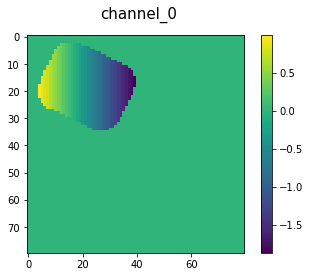

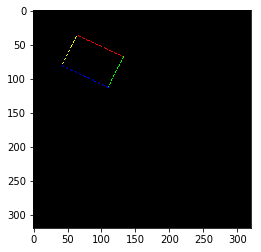

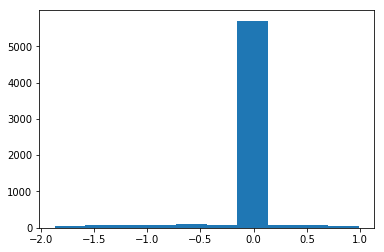

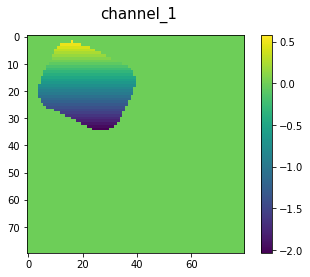

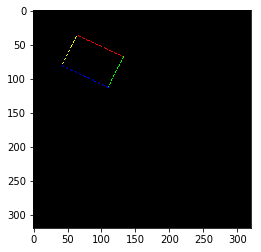

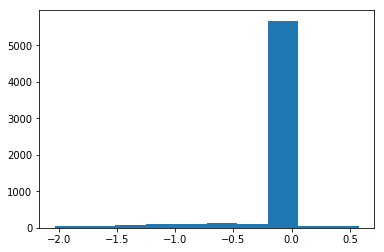

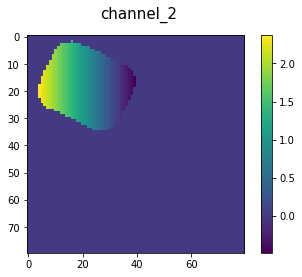

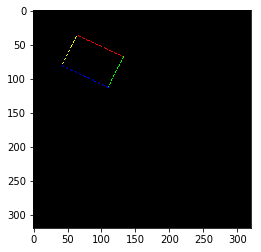

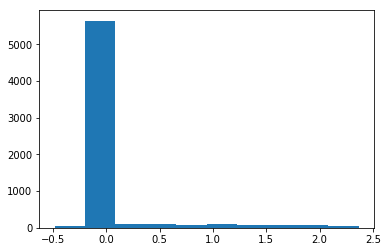

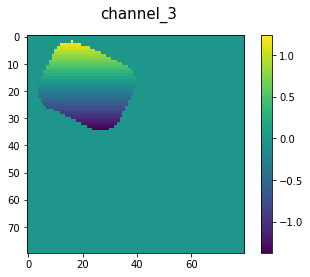

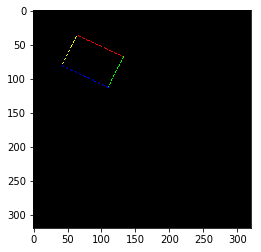

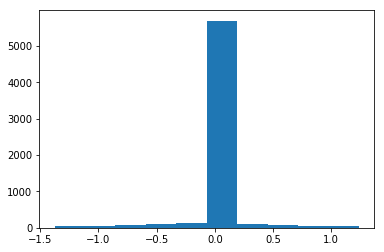

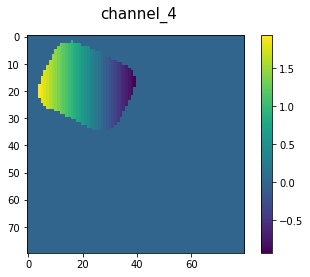

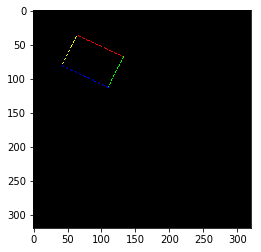

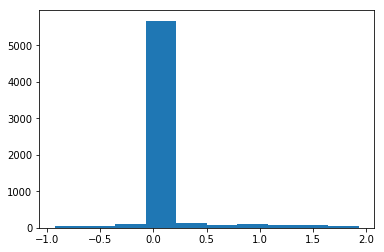

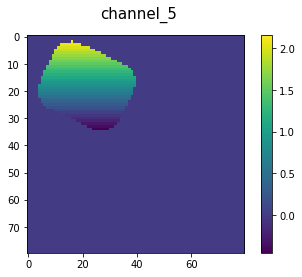

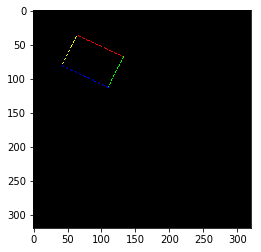

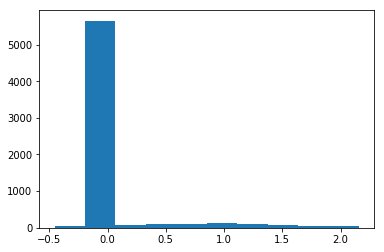

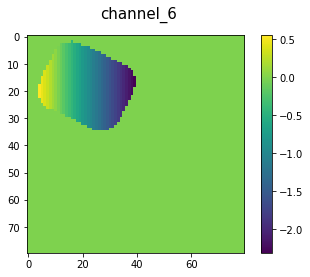

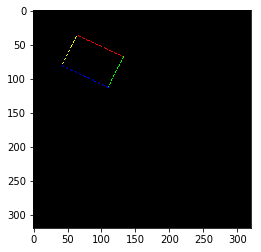

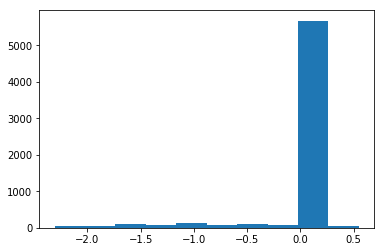

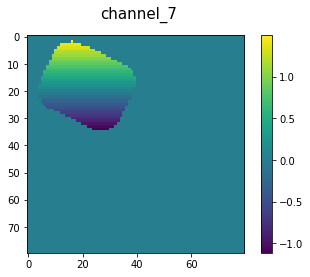

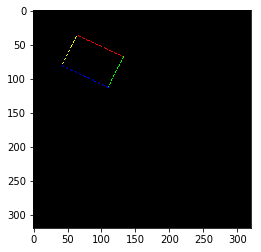

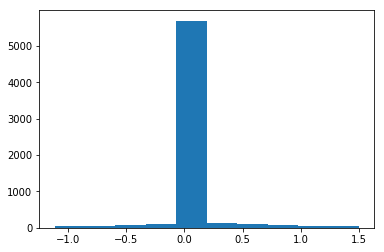

In [12]:
import matplotlib.pyplot as plt
from functions import draw_quad
for c in range(8):
    fig = plt.figure()
    fig.suptitle('channel_%d'%c, fontsize=15)

    img = gt_loc[0,c,:,:].data
    img_c = np.zeros((320,320,3), dtype=np.uint8)
    
    plt.imshow(img, interpolation=None); plt.colorbar(); plt.show()
    
    draw_quad(img_c, labels[0][0].astype(np.uint64))
    plt.imshow(img_c); plt.show()
    
    plt.hist(img.ravel()); plt.show()

In [13]:
labels[0].shape

(1, 4, 2)

In [14]:
# something is wrong with encoding?

In [15]:
imgs_down, labels_down = downsample(imgs_c, labels_c)

In [16]:
db.visualize_batch

<bound method RotatedDataset.visualize_batch of <dataset.RotatedDataset instance at 0x7f9996850200>>

In [17]:
from chainer.optimizers import MomentumSGD,Adam 

In [18]:
from network import VGGNet

net = VGGNet()
net.to_gpu(0)

#Ok now let's start the training process
#optimizer =MomentumSGD(lr= 0.0001)
optimizer=Adam(alpha= 0.00001)
optimizer.setup(net)

  0%|          | 0/1000 [00:00<?, ?it/s]

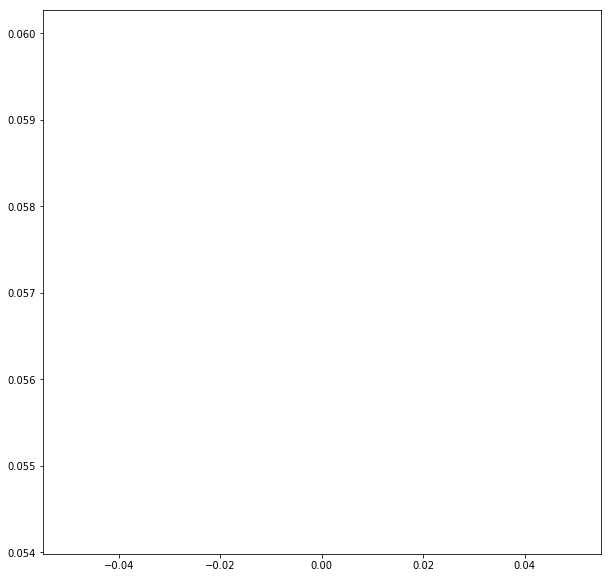

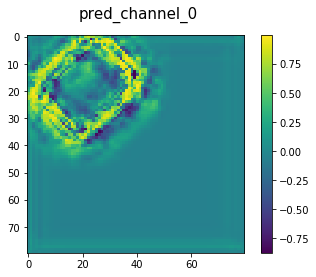

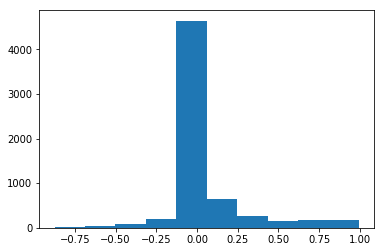

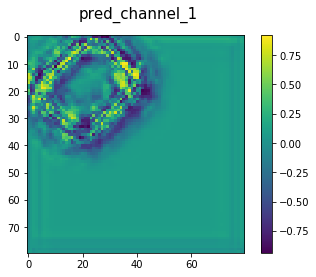

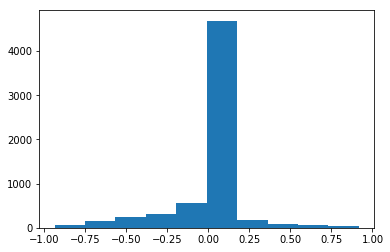

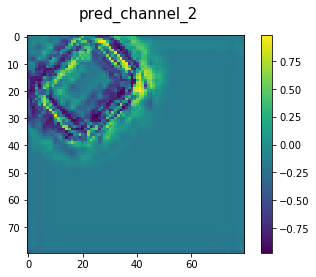

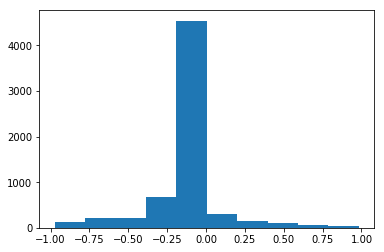

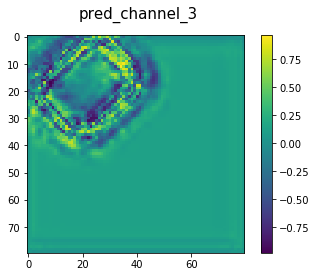

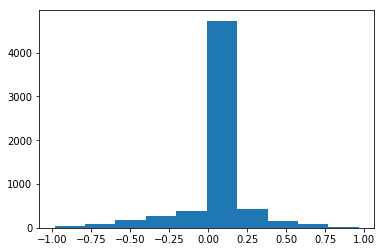

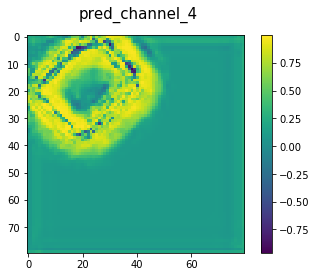

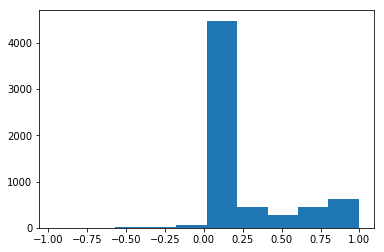

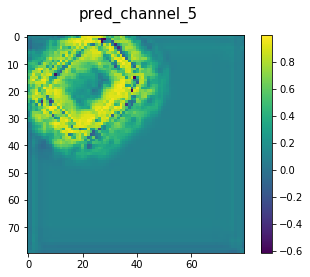

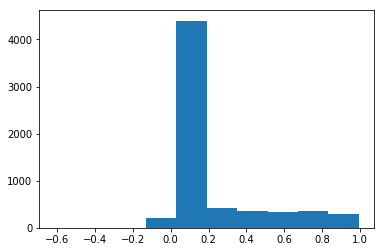

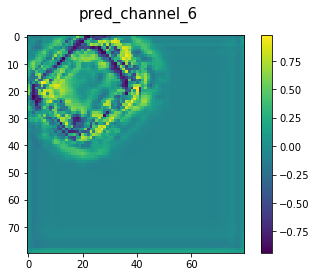

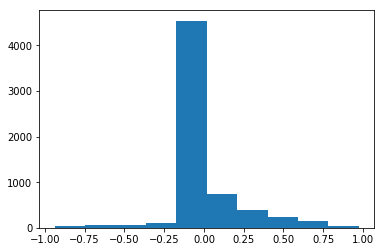

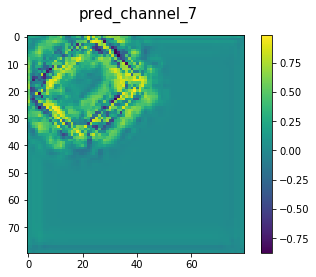

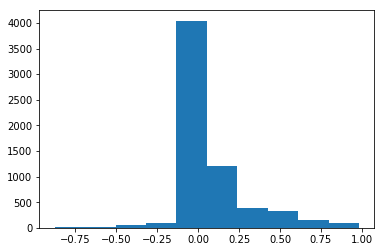

  1%|          | 10/1000 [00:05<05:14,  3.15it/s]

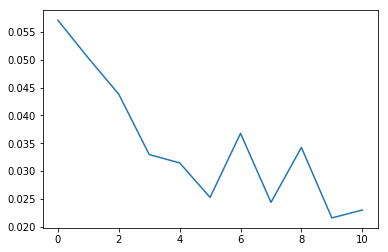

  2%|▏         | 20/1000 [00:07<03:08,  5.20it/s]

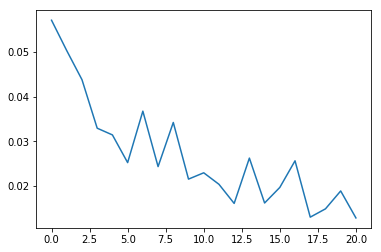

  3%|▎         | 30/1000 [00:09<03:02,  5.31it/s]

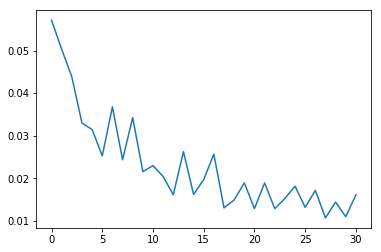

  4%|▍         | 40/1000 [00:11<03:01,  5.28it/s]

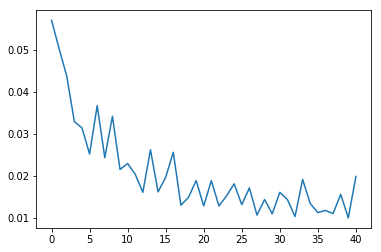

  5%|▌         | 50/1000 [00:13<02:59,  5.30it/s]

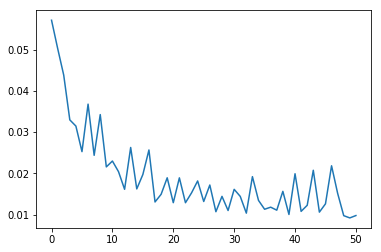

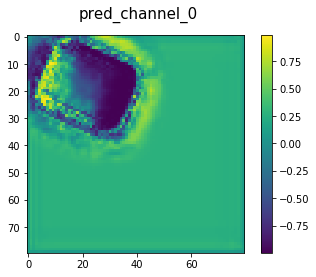

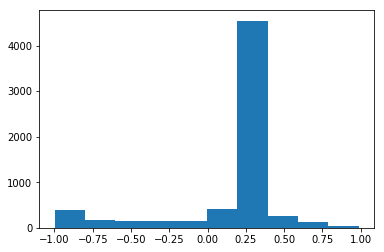

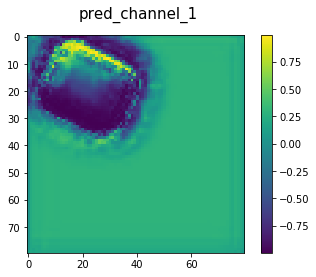

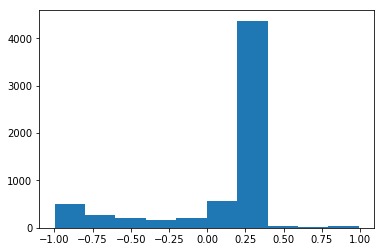

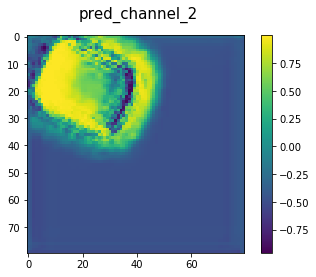

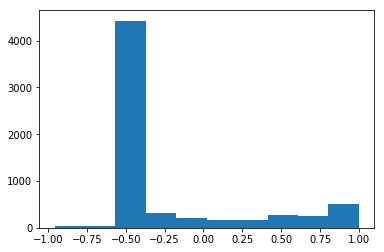

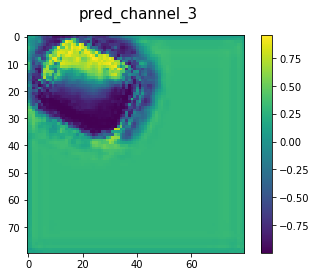

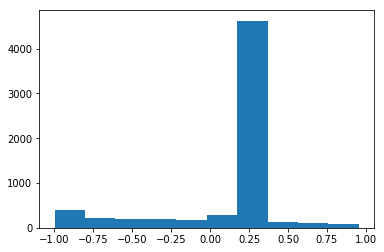

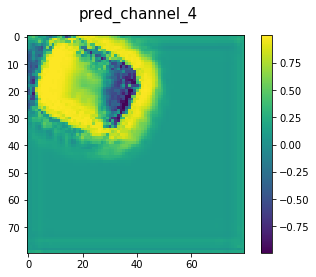

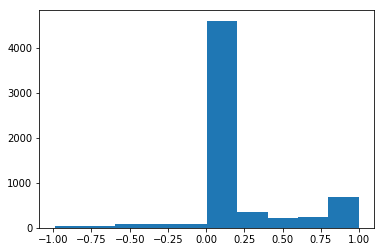

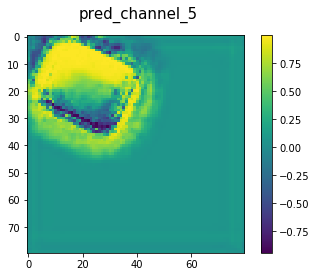

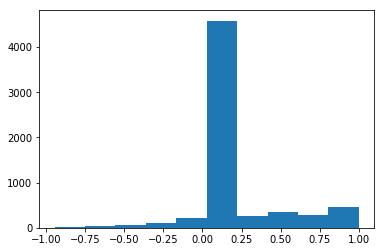

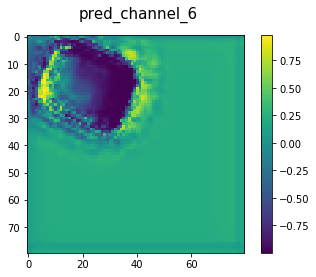

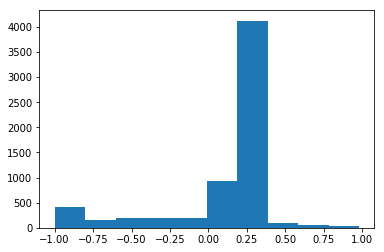

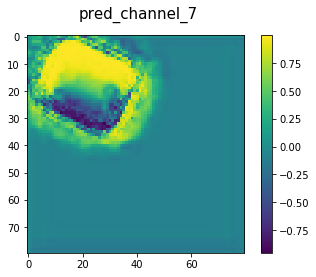

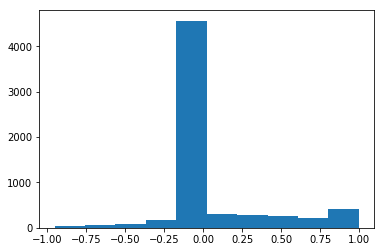

  6%|▌         | 60/1000 [00:17<03:24,  4.60it/s]

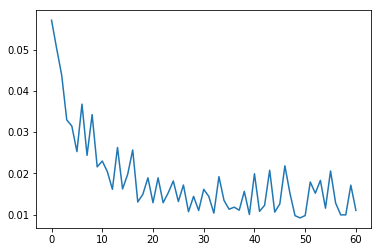

  7%|▋         | 70/1000 [00:19<02:56,  5.28it/s]

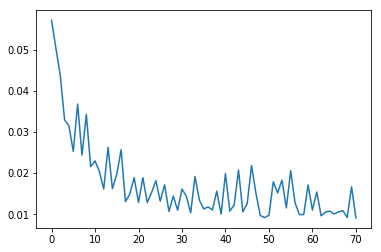

  8%|▊         | 80/1000 [00:21<02:54,  5.27it/s]

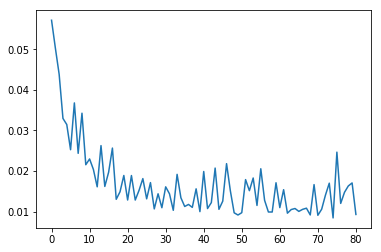

  9%|▉         | 90/1000 [00:23<02:51,  5.31it/s]

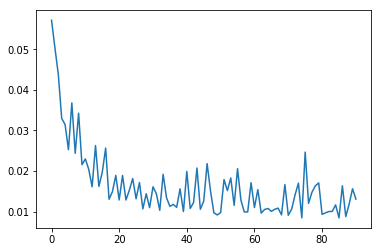

 10%|█         | 100/1000 [00:25<02:49,  5.30it/s]

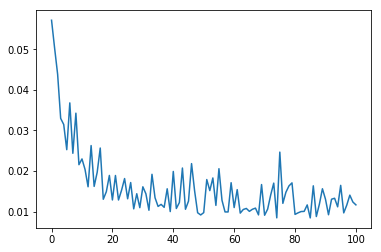

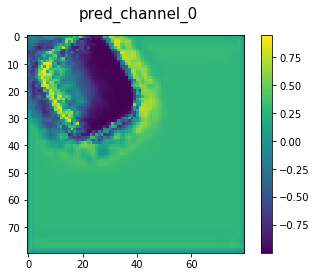

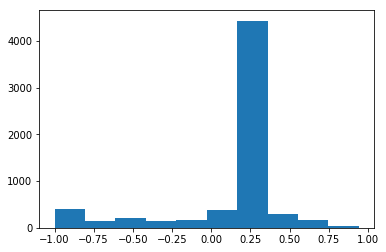

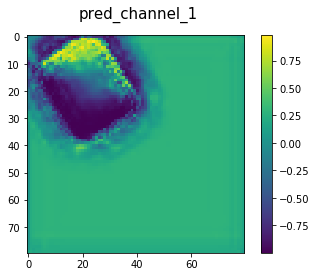

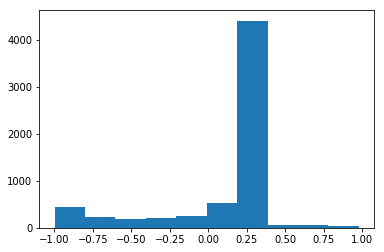

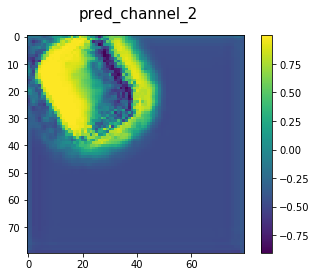

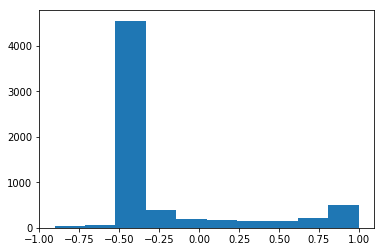

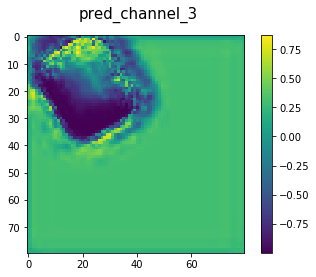

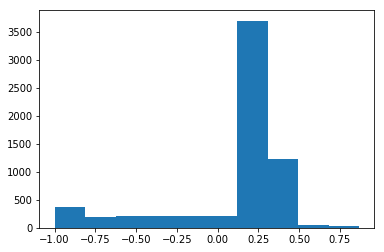

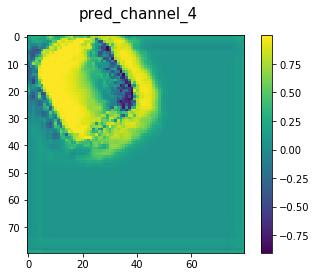

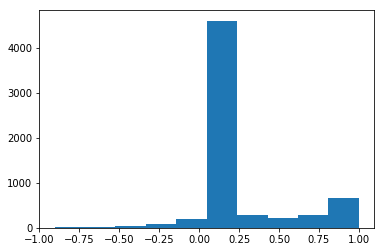

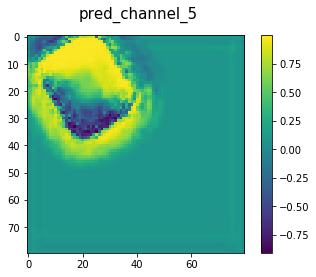

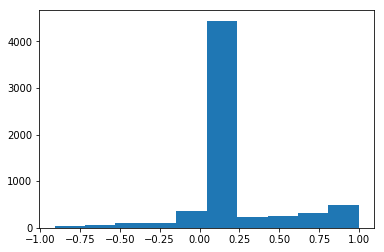

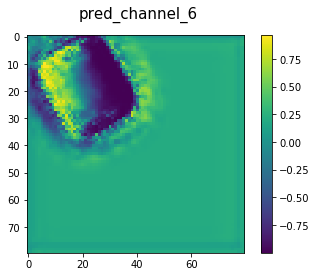

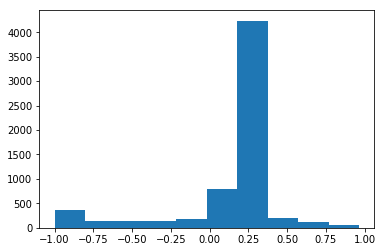

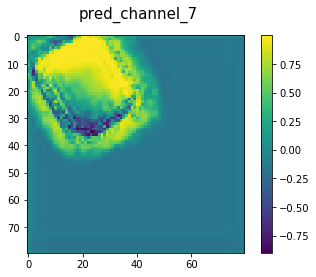

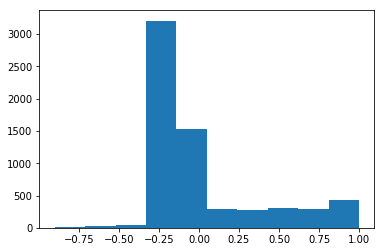

 11%|█         | 110/1000 [00:29<03:13,  4.60it/s]

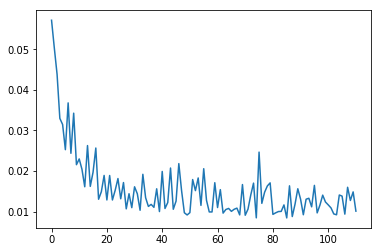

 12%|█▏        | 120/1000 [00:31<02:46,  5.28it/s]

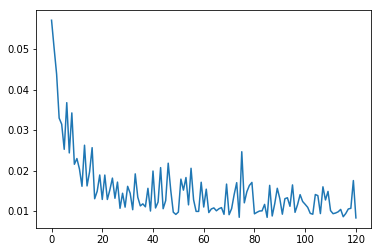

 13%|█▎        | 130/1000 [00:33<02:43,  5.31it/s]

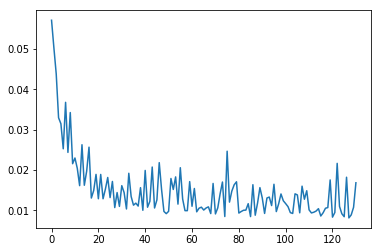

 14%|█▍        | 140/1000 [00:35<02:42,  5.30it/s]

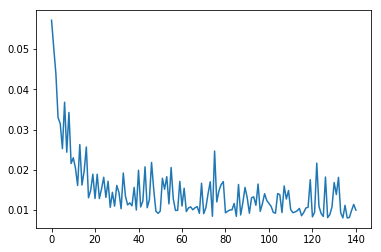

 15%|█▌        | 150/1000 [00:37<02:40,  5.29it/s]

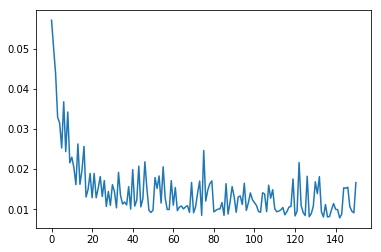

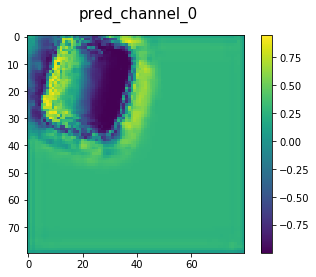

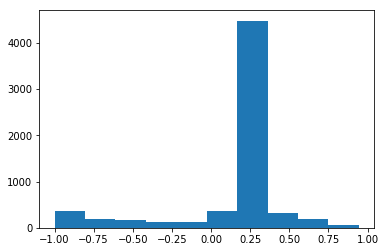

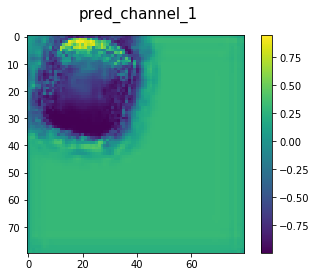

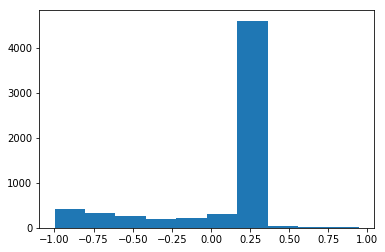

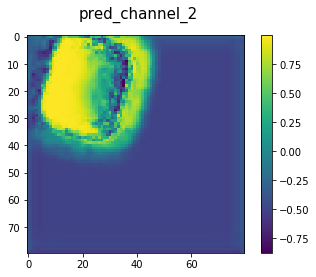

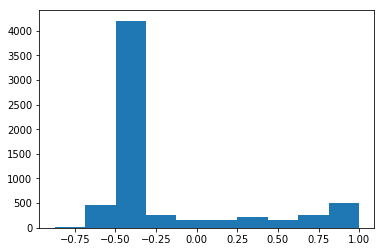

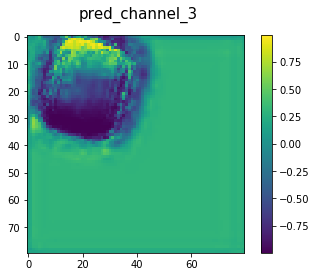

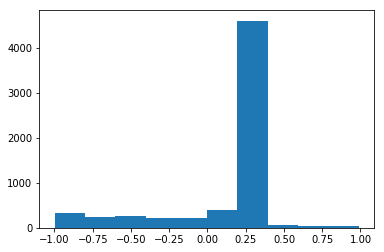

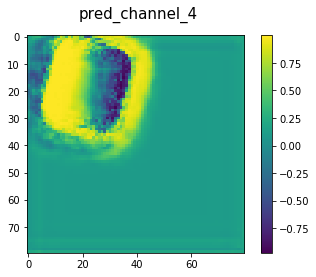

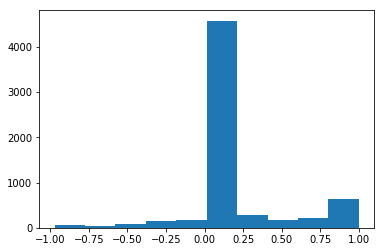

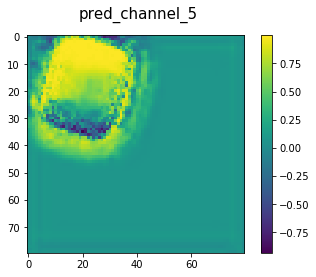

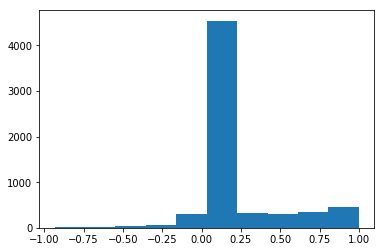

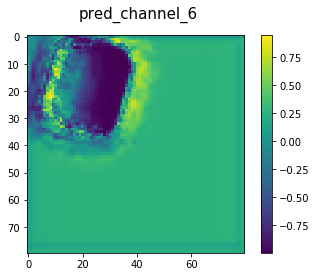

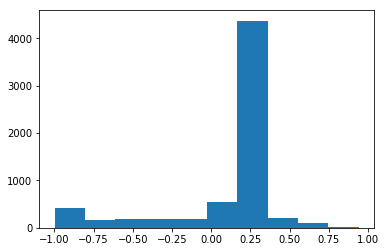

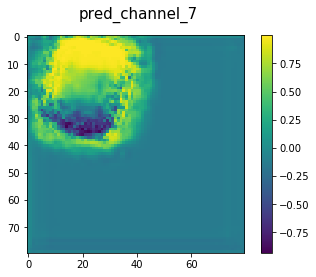

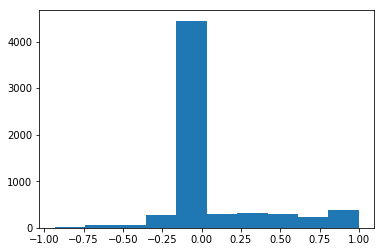

 16%|█▌        | 160/1000 [00:42<03:04,  4.55it/s]

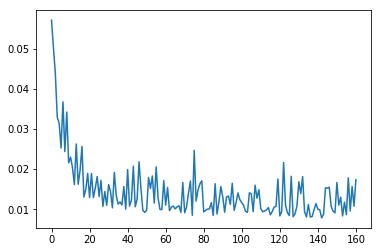

 17%|█▋        | 170/1000 [00:44<02:37,  5.28it/s]

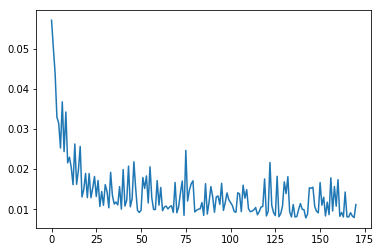

 18%|█▊        | 180/1000 [00:46<02:33,  5.33it/s]

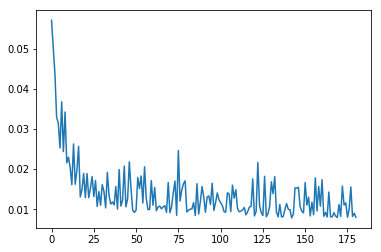

 19%|█▉        | 190/1000 [00:48<02:32,  5.31it/s]

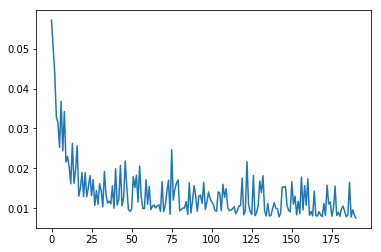

 20%|██        | 200/1000 [00:50<02:30,  5.32it/s]

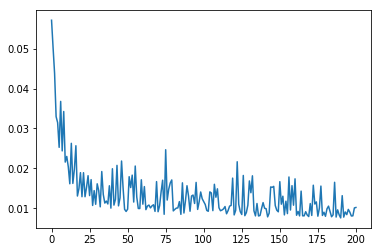

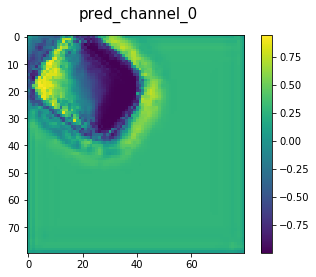

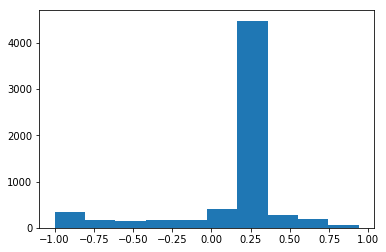

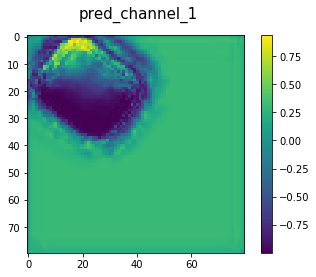

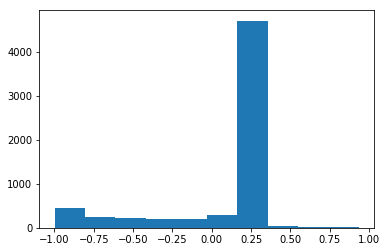

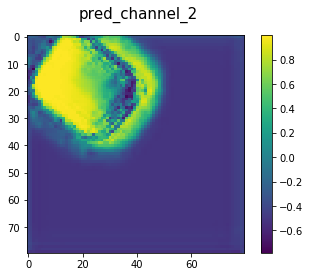

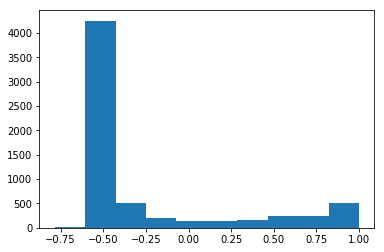

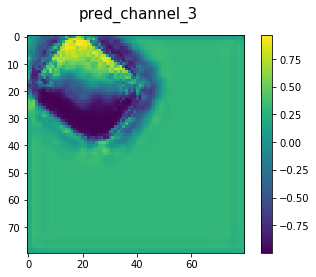

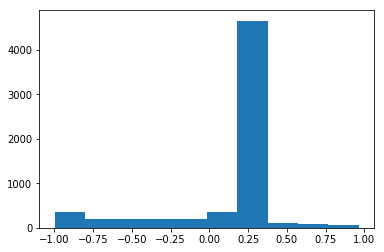

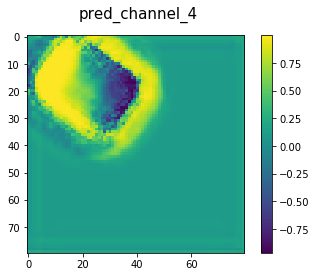

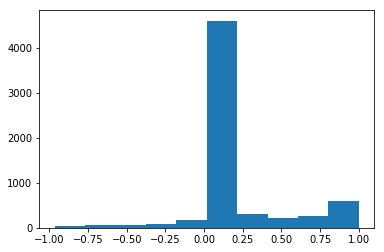

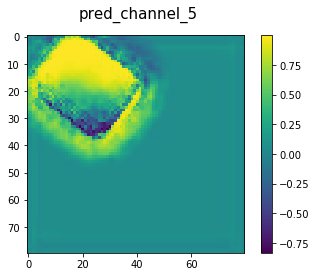

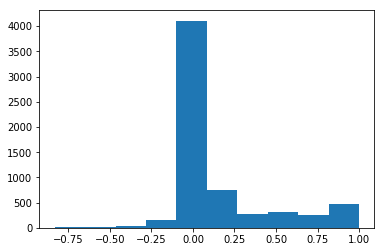

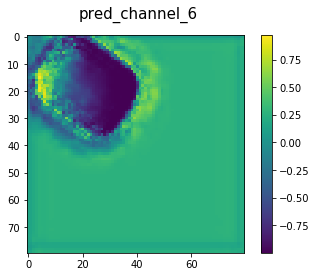

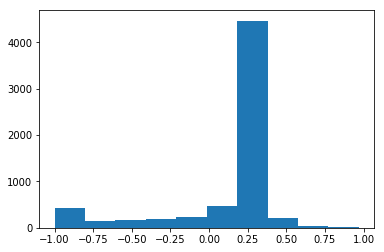

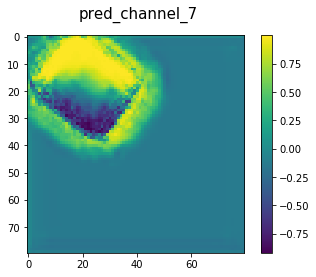

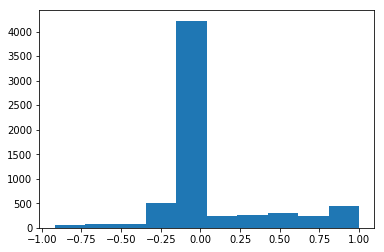

 21%|██        | 210/1000 [00:54<02:51,  4.61it/s]

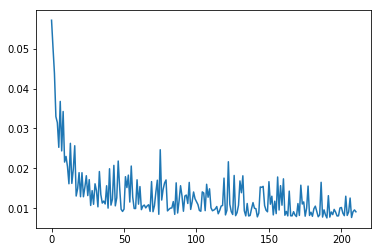

 22%|██▏       | 220/1000 [00:56<02:27,  5.28it/s]

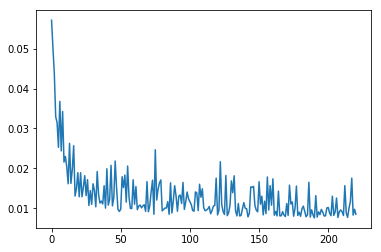

 23%|██▎       | 230/1000 [00:58<02:24,  5.32it/s]

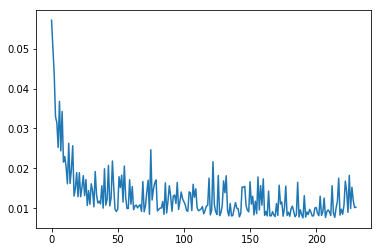

 24%|██▍       | 240/1000 [01:00<02:23,  5.31it/s]

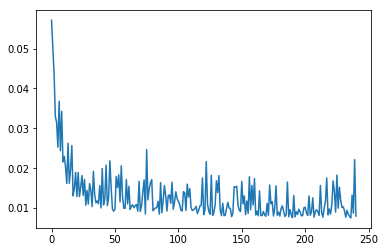

 25%|██▌       | 250/1000 [01:02<02:21,  5.32it/s]

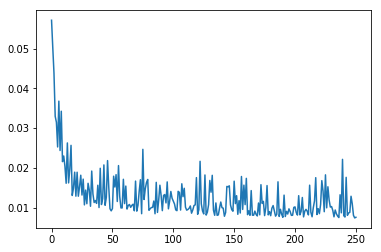

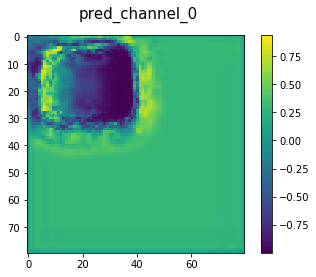

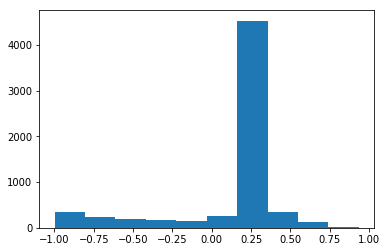

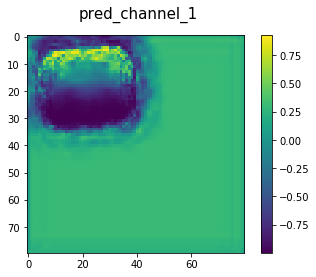

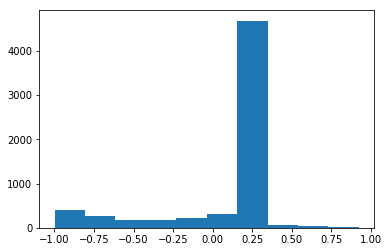

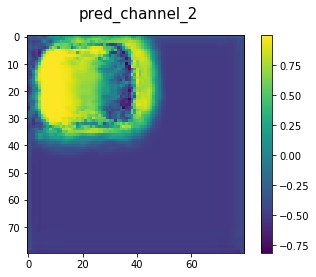

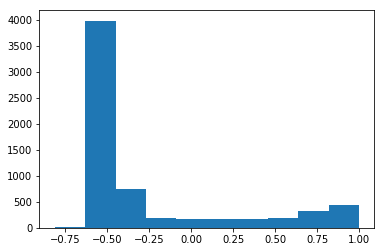

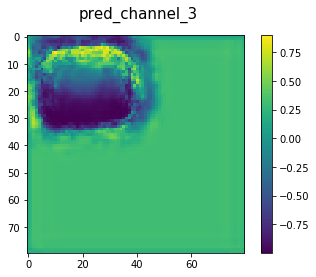

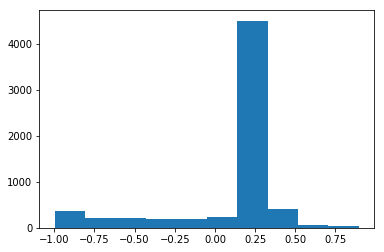

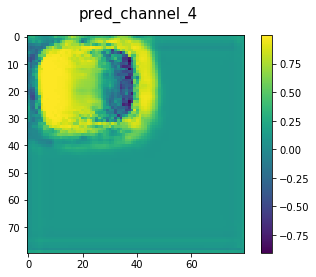

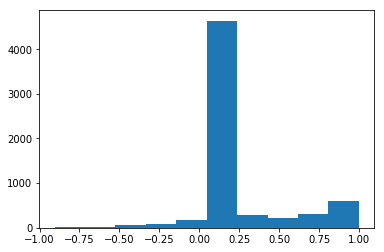

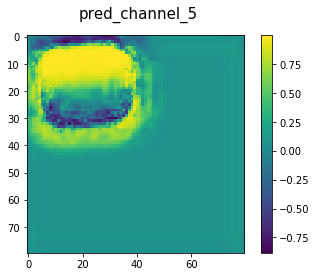

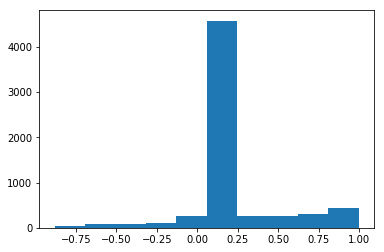

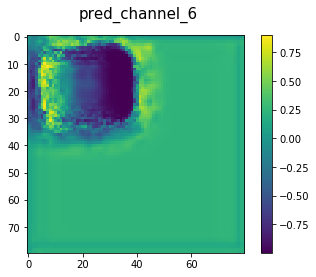

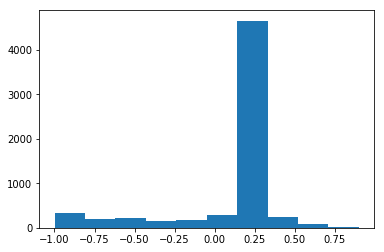

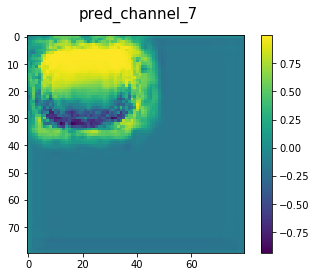

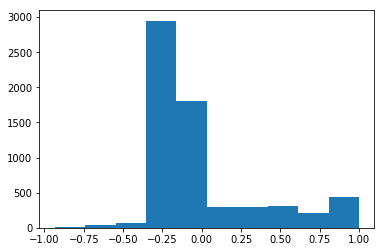

 26%|██▌       | 260/1000 [01:06<02:39,  4.63it/s]

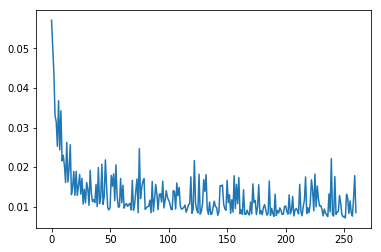

 27%|██▋       | 270/1000 [01:08<02:17,  5.29it/s]

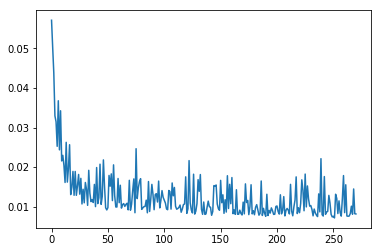

 28%|██▊       | 280/1000 [01:10<02:17,  5.25it/s]

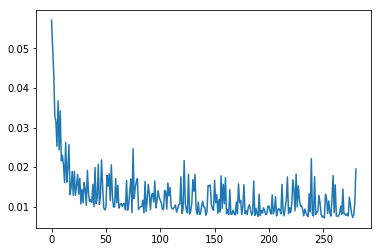

 29%|██▉       | 290/1000 [01:12<02:13,  5.32it/s]

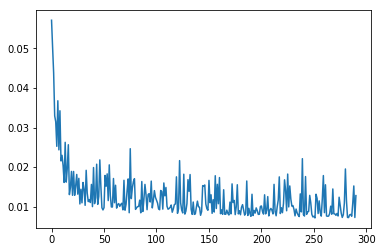

 30%|███       | 300/1000 [01:14<02:12,  5.28it/s]

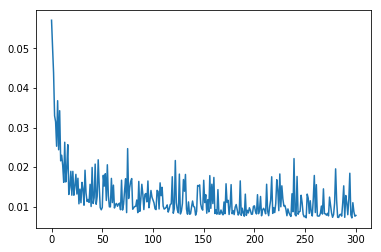

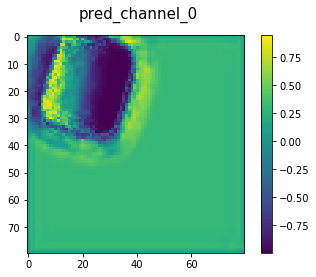

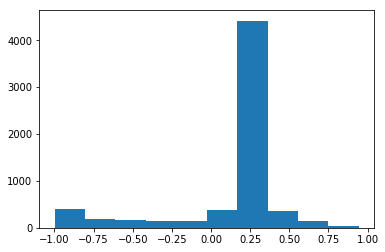

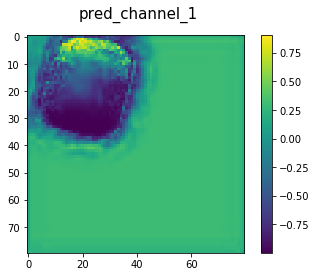

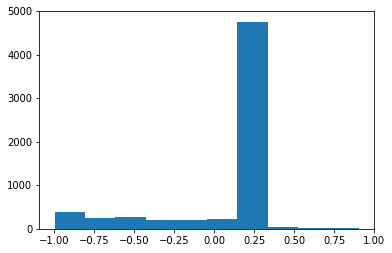

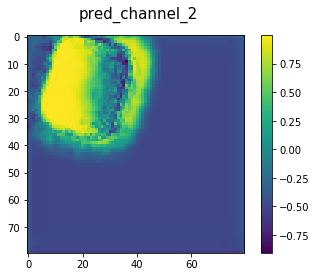

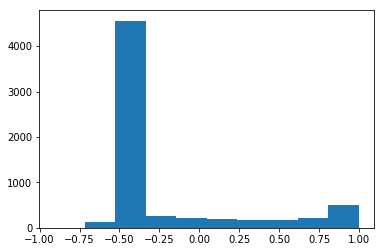

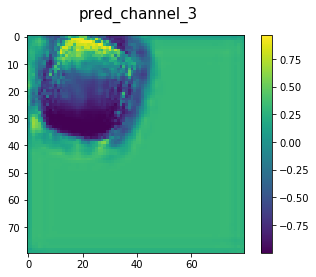

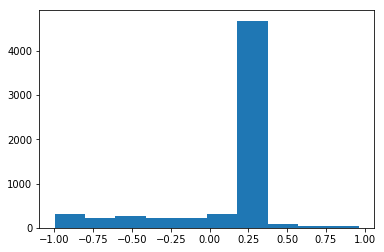

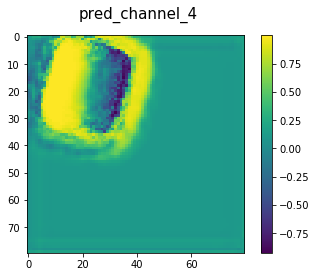

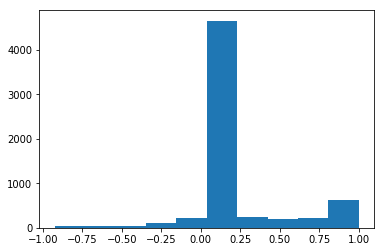

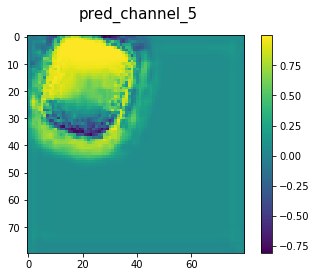

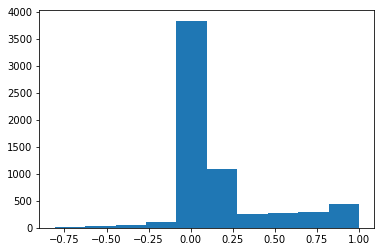

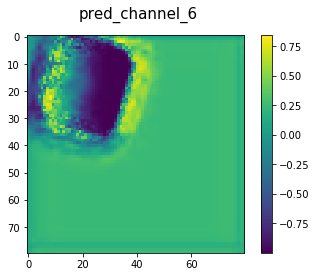

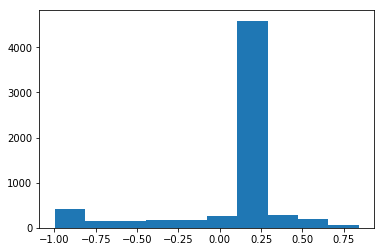

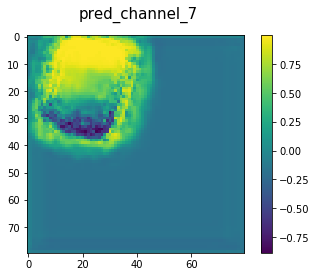

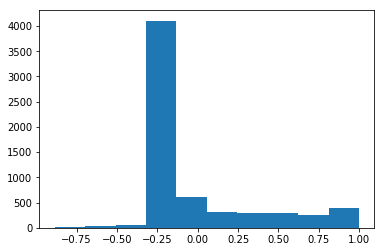

 31%|███       | 310/1000 [01:18<02:32,  4.53it/s]

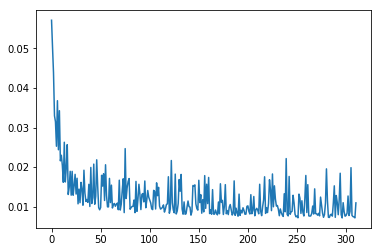

 32%|███▏      | 320/1000 [01:20<02:11,  5.18it/s]

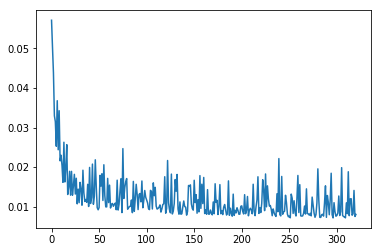

 33%|███▎      | 330/1000 [01:22<02:06,  5.30it/s]

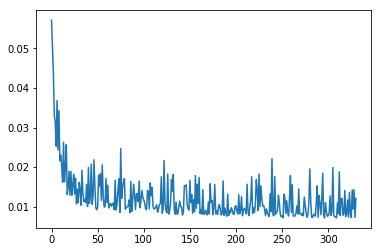

 34%|███▍      | 340/1000 [01:24<02:04,  5.31it/s]

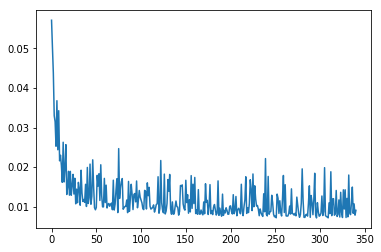

 35%|███▌      | 350/1000 [01:26<02:02,  5.32it/s]

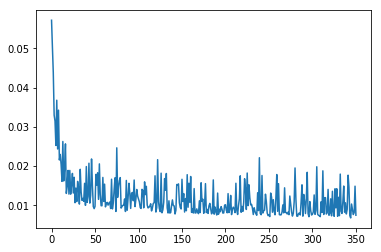

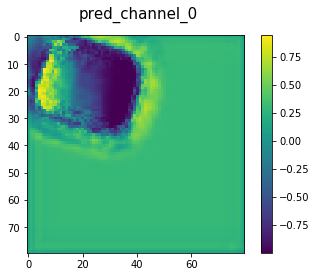

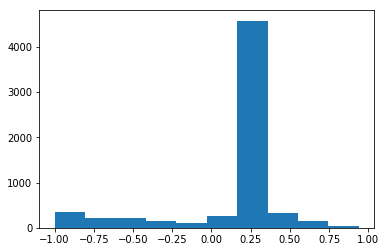

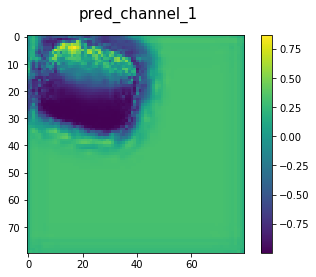

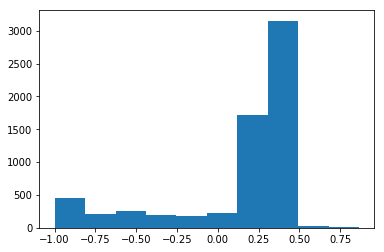

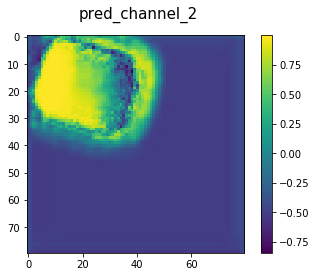

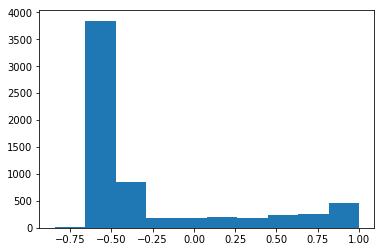

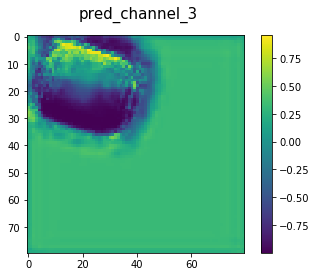

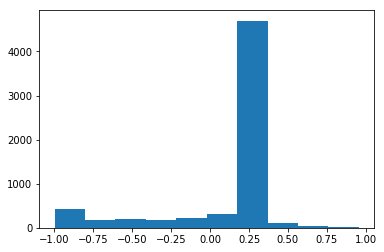

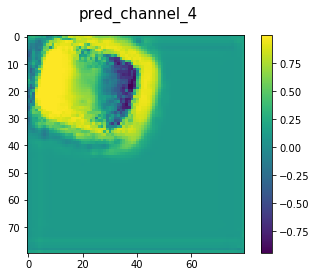

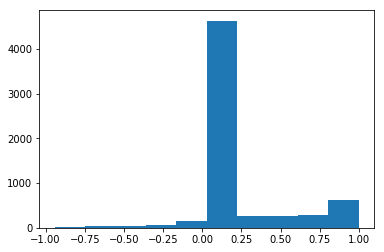

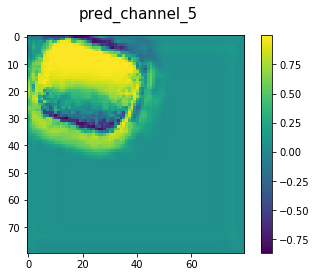

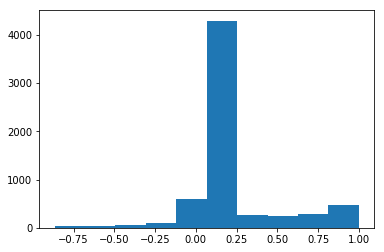

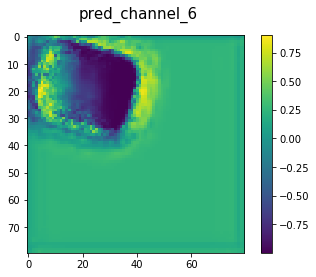

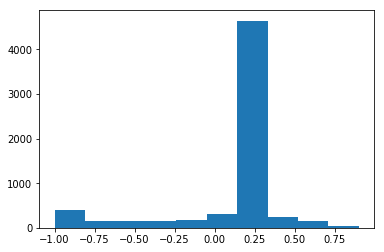

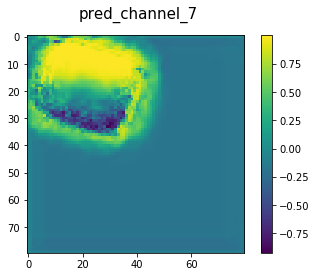

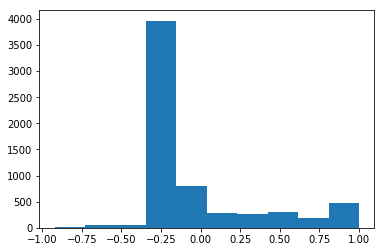

 36%|███▌      | 360/1000 [01:31<02:18,  4.61it/s]

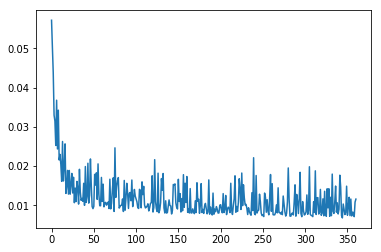

 37%|███▋      | 370/1000 [01:33<01:59,  5.29it/s]

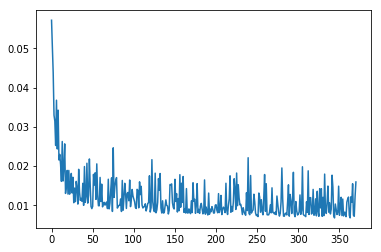

 38%|███▊      | 380/1000 [01:35<01:57,  5.29it/s]

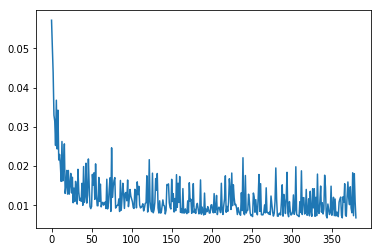

 39%|███▉      | 390/1000 [01:37<01:54,  5.32it/s]

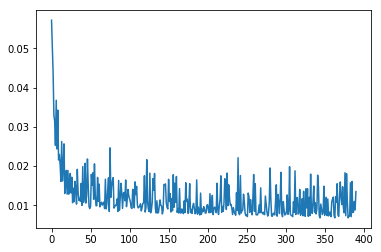

 40%|████      | 400/1000 [01:39<01:53,  5.30it/s]

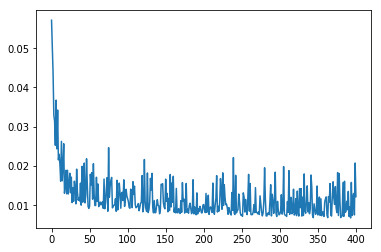

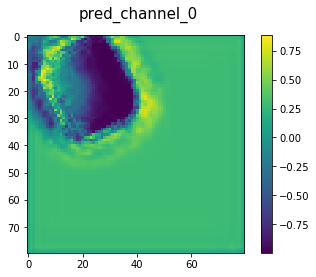

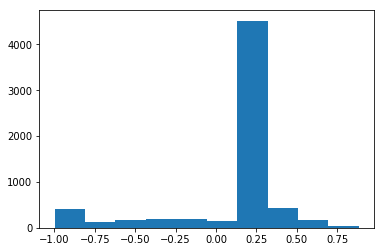

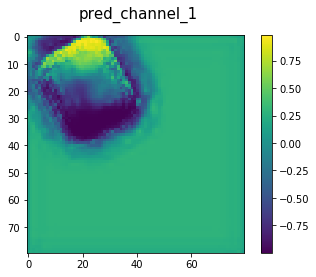

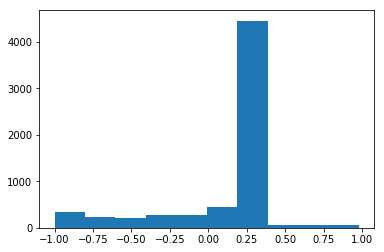

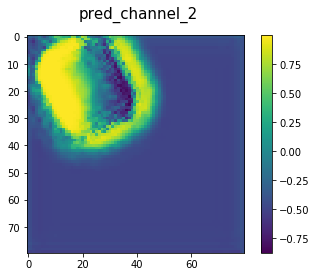

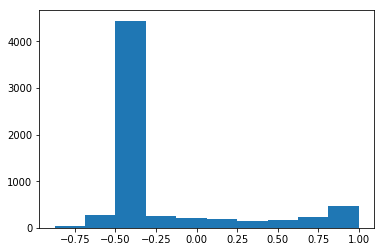

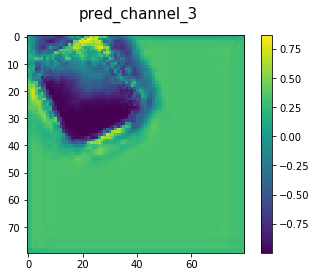

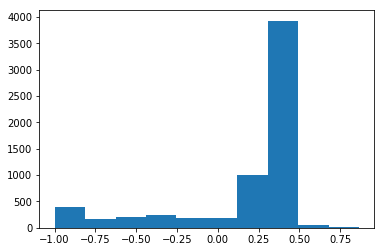

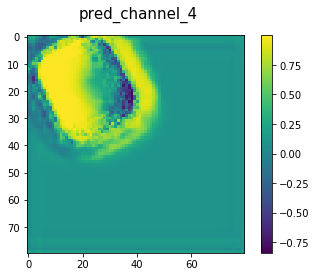

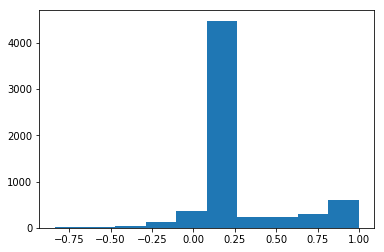

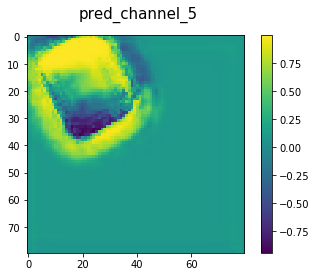

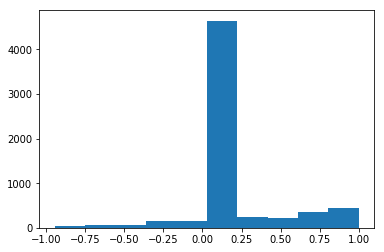

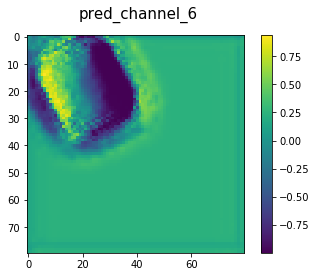

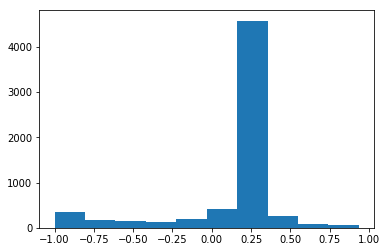

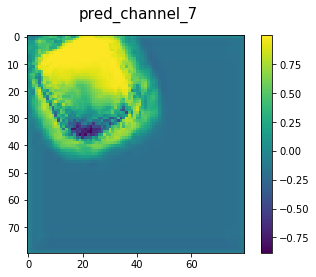

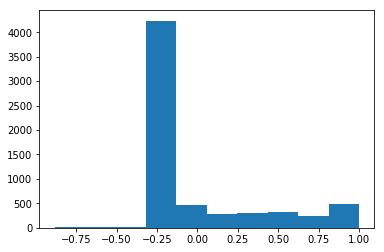

 41%|████      | 410/1000 [01:43<02:07,  4.62it/s]

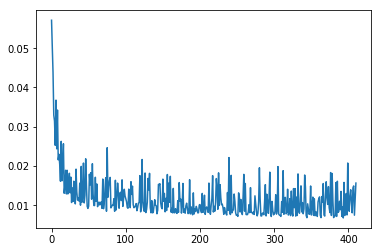

 42%|████▏     | 420/1000 [01:45<01:49,  5.29it/s]

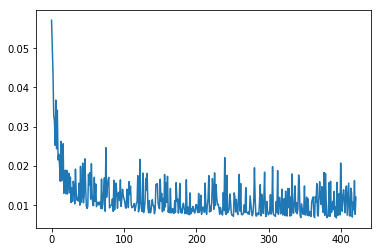

 43%|████▎     | 430/1000 [01:47<01:47,  5.30it/s]

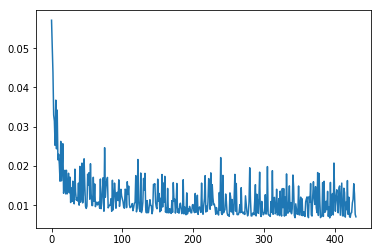

 44%|████▍     | 440/1000 [01:49<01:45,  5.32it/s]

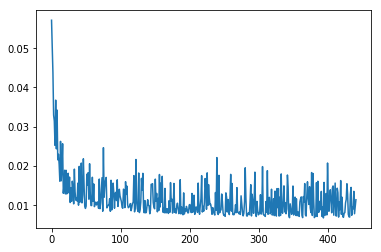

 45%|████▌     | 450/1000 [01:51<01:43,  5.33it/s]

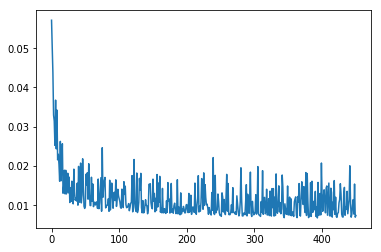

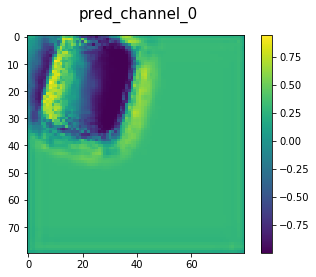

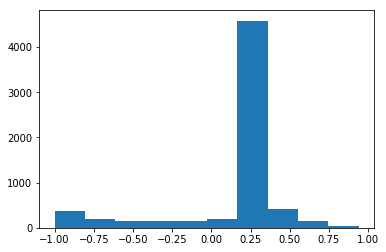

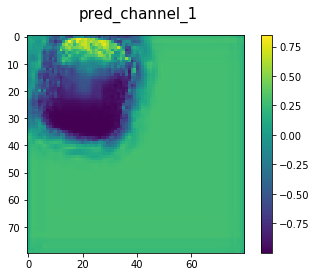

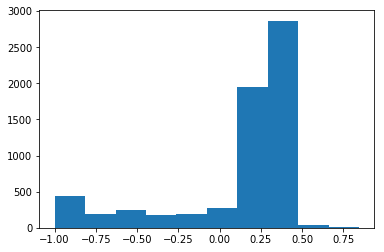

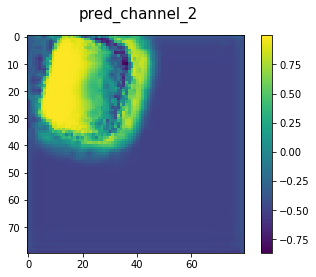

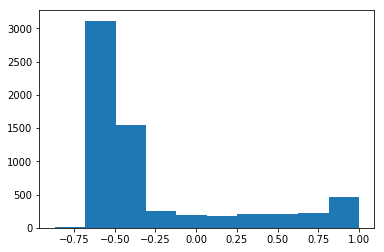

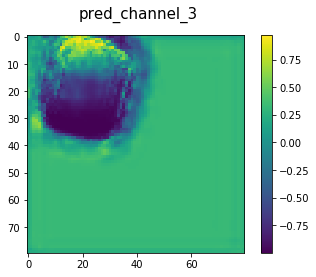

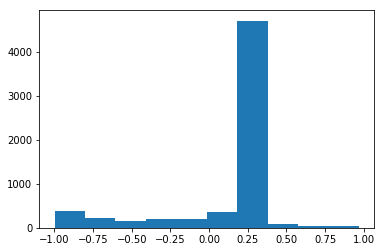

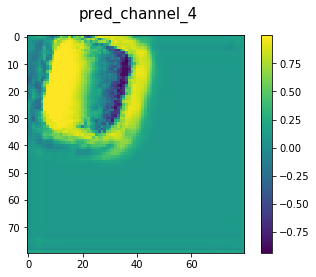

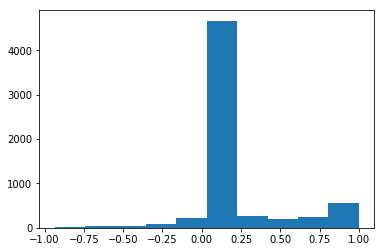

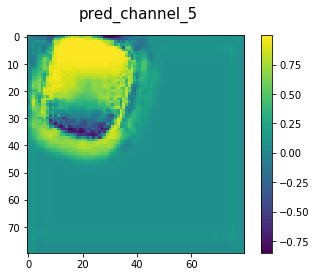

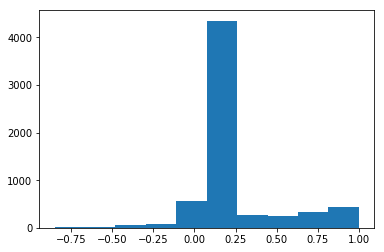

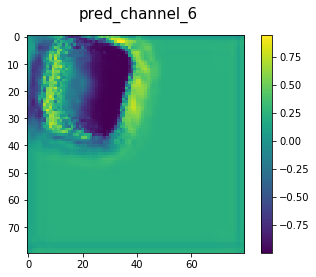

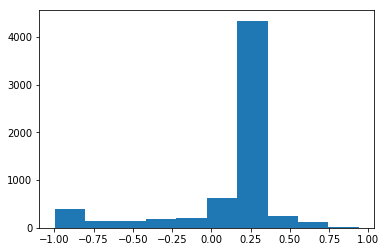

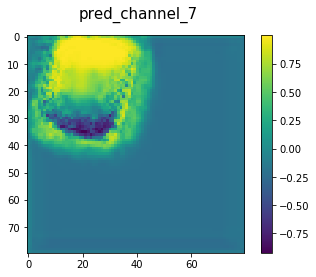

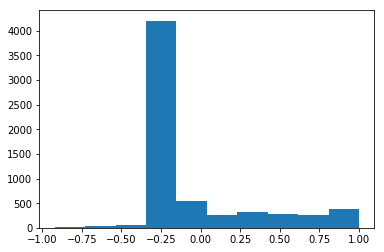

 46%|████▌     | 460/1000 [01:55<01:56,  4.62it/s]

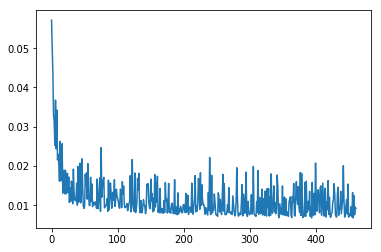

 47%|████▋     | 470/1000 [01:57<01:40,  5.30it/s]

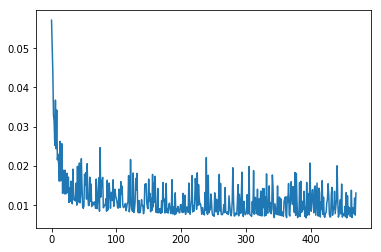

 48%|████▊     | 480/1000 [01:59<01:37,  5.32it/s]

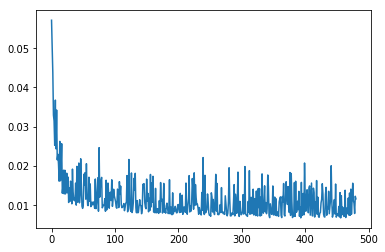

 49%|████▉     | 490/1000 [02:01<01:36,  5.28it/s]

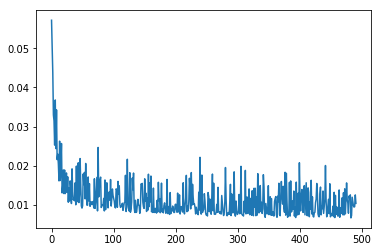

 50%|█████     | 500/1000 [02:03<01:34,  5.31it/s]

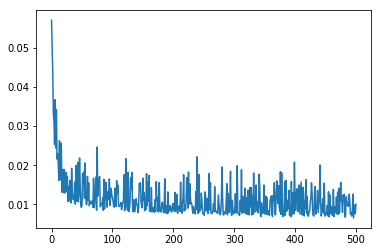

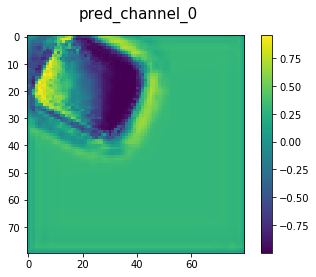

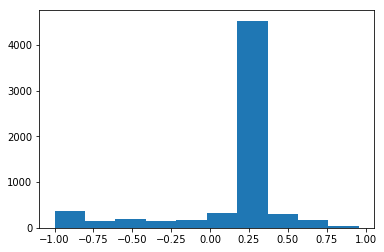

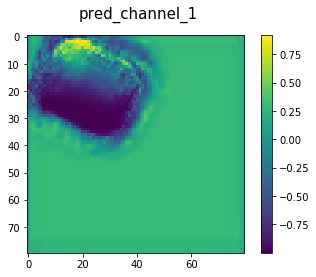

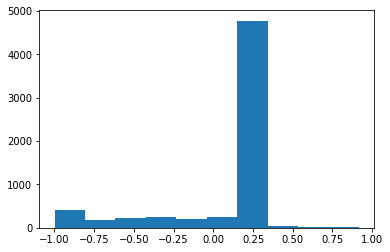

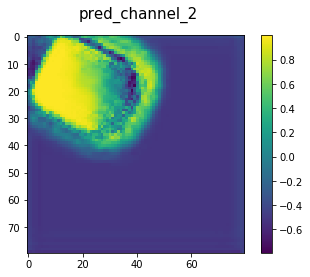

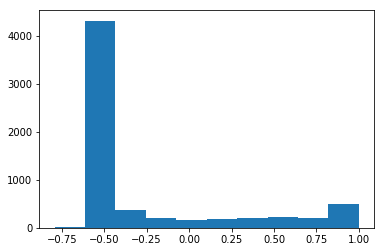

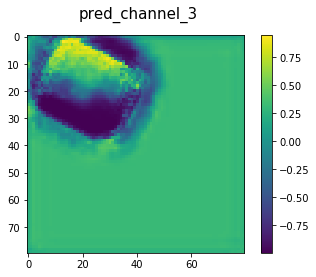

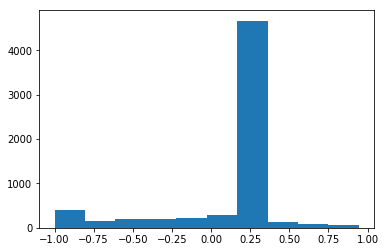

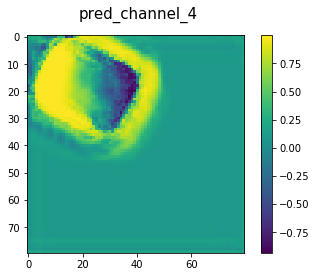

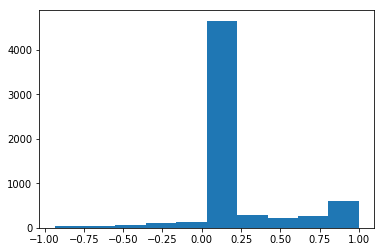

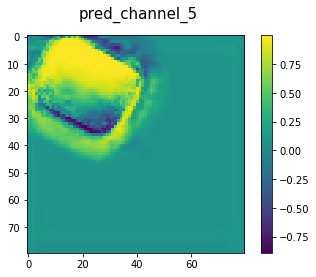

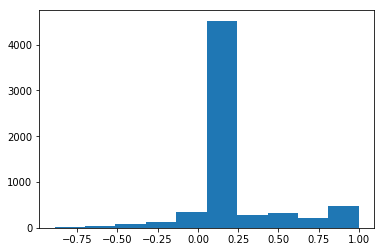

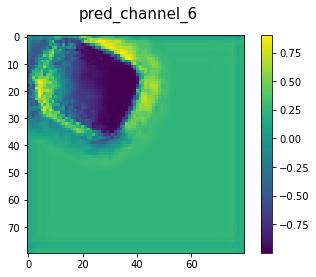

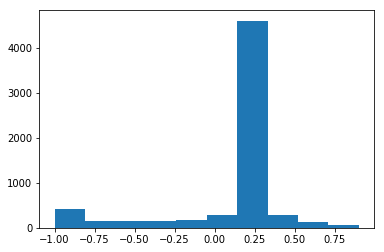

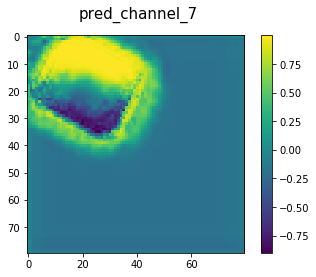

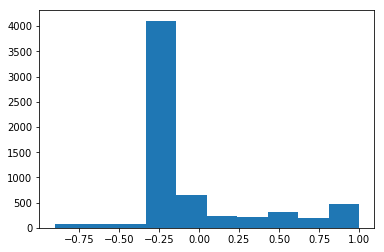

 51%|█████     | 510/1000 [02:07<01:46,  4.60it/s]

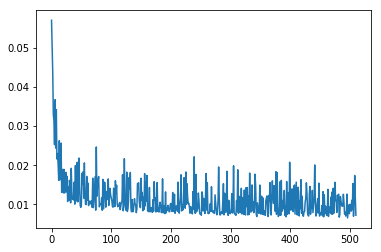

 52%|█████▏    | 520/1000 [02:09<01:30,  5.30it/s]

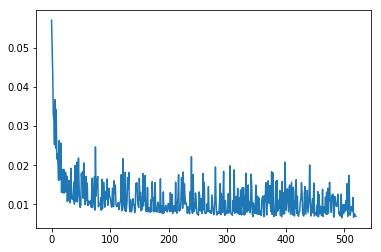

 53%|█████▎    | 530/1000 [02:11<01:29,  5.27it/s]

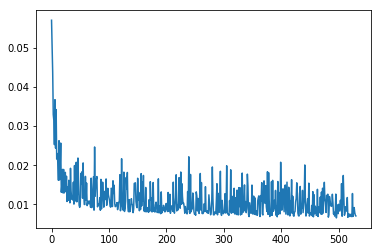

 54%|█████▍    | 540/1000 [02:13<01:26,  5.31it/s]

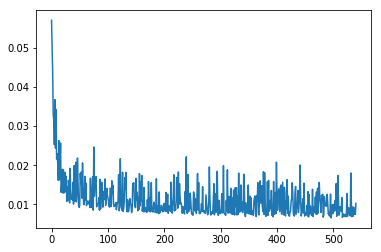

 55%|█████▌    | 550/1000 [02:15<01:24,  5.30it/s]

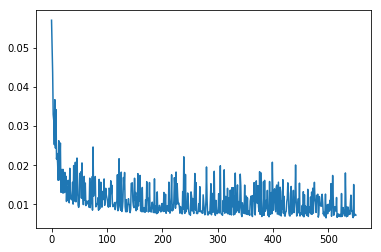

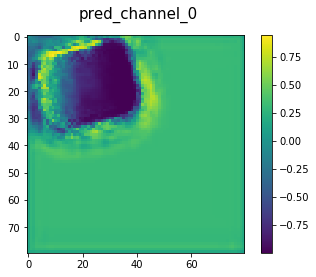

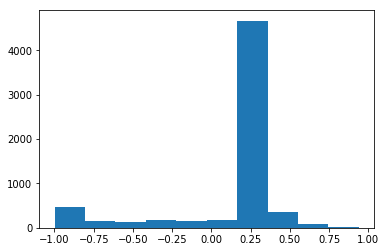

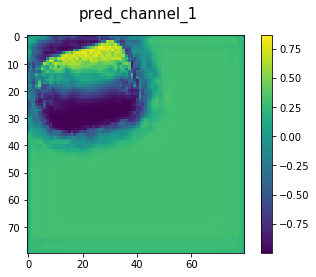

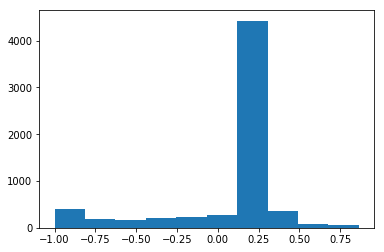

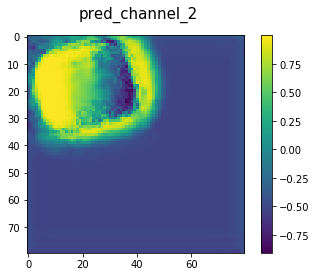

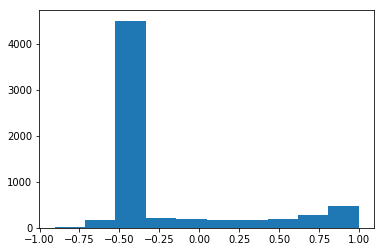

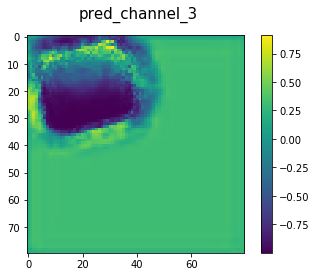

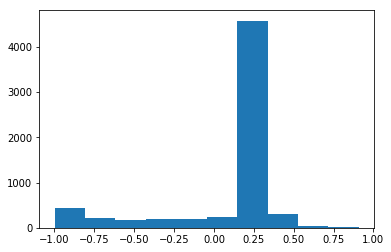

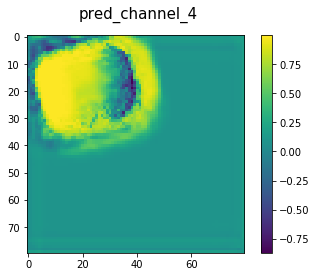

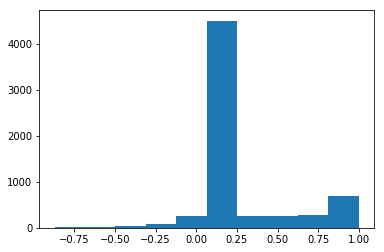

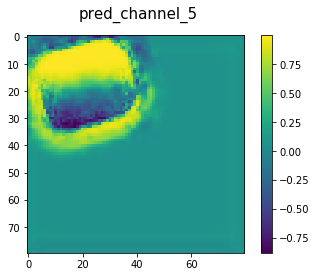

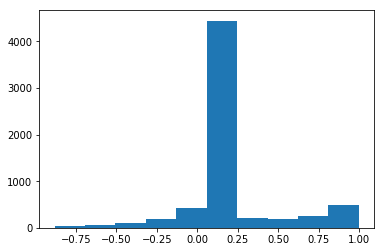

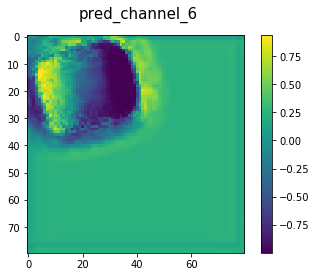

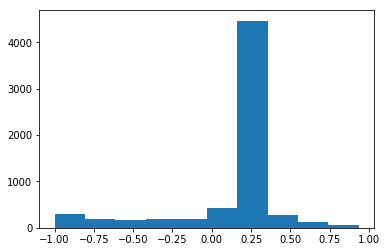

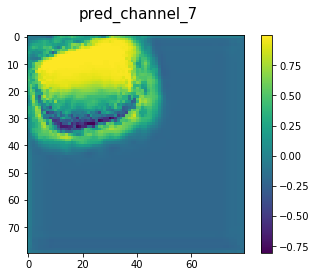

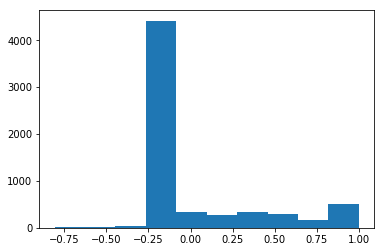

 56%|█████▌    | 560/1000 [02:20<01:34,  4.63it/s]

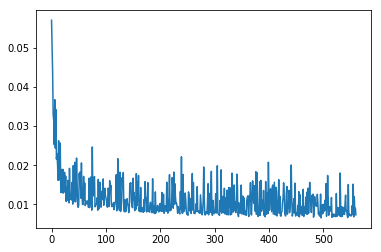

 57%|█████▋    | 570/1000 [02:22<01:21,  5.30it/s]

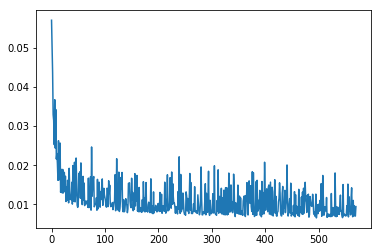

 58%|█████▊    | 580/1000 [02:24<01:21,  5.16it/s]

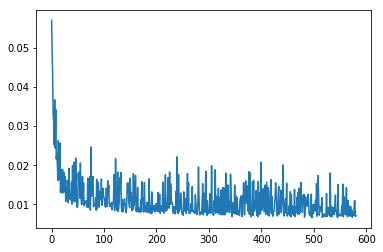

 59%|█████▉    | 590/1000 [02:26<01:17,  5.30it/s]

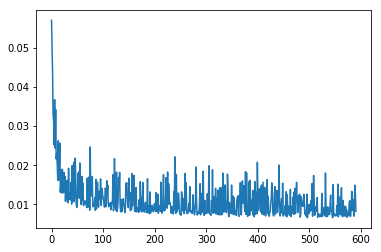

 60%|██████    | 600/1000 [02:28<01:15,  5.31it/s]

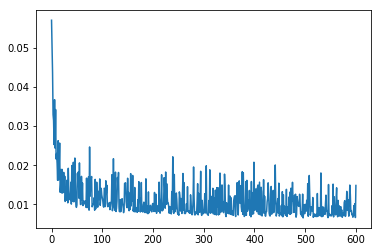

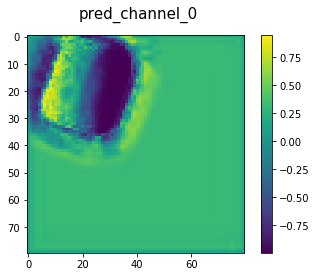

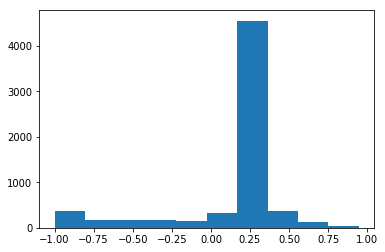

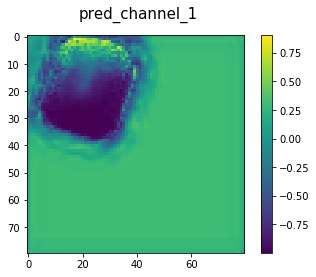

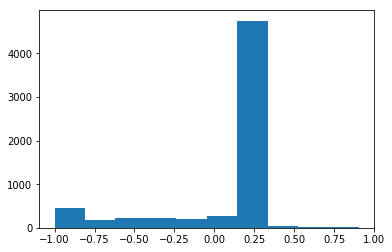

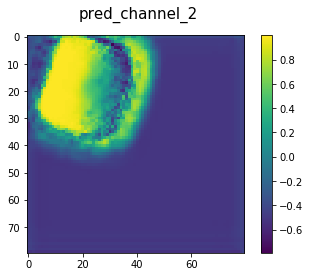

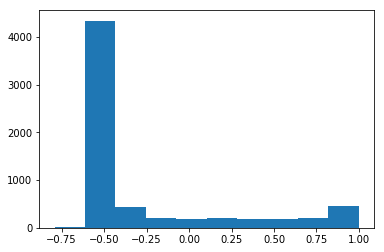

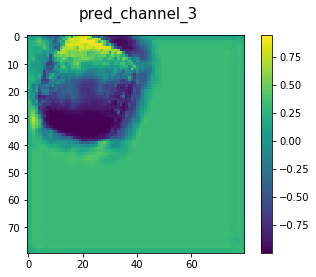

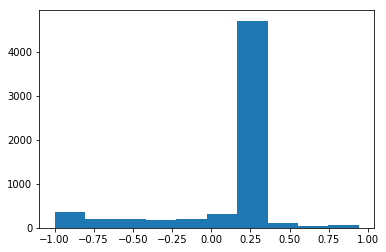

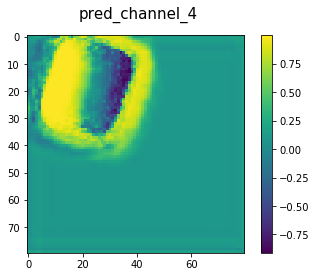

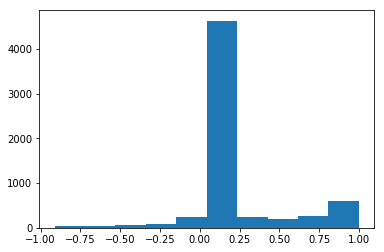

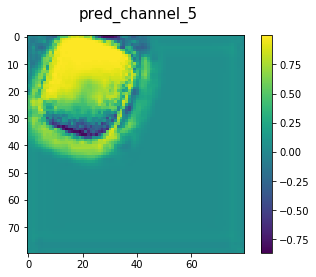

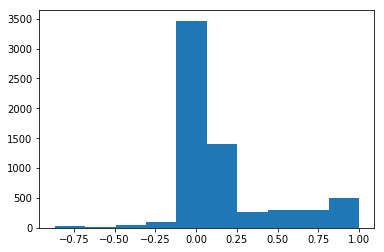

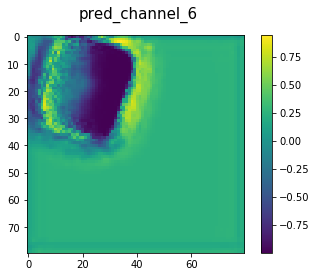

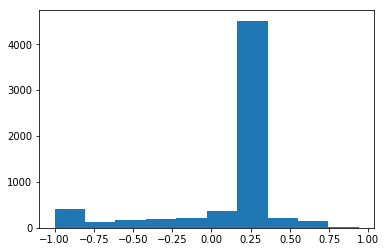

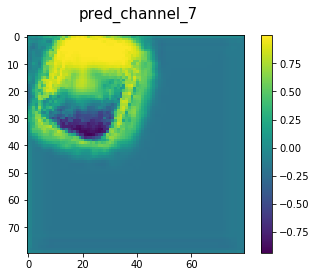

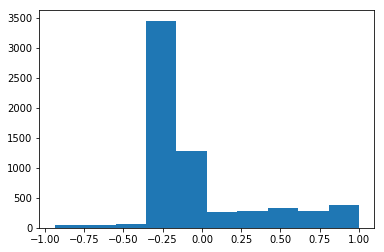

 61%|██████    | 610/1000 [02:32<01:24,  4.60it/s]

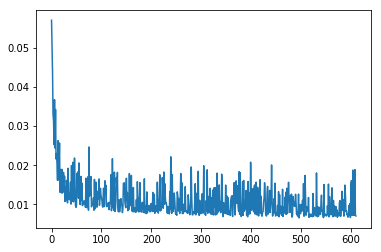

 62%|██████▏   | 620/1000 [02:34<01:11,  5.29it/s]

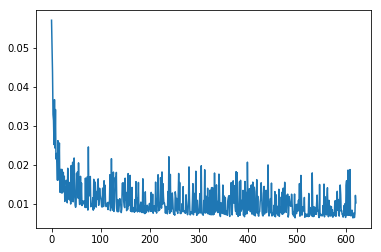

 63%|██████▎   | 630/1000 [02:36<01:21,  4.53it/s]

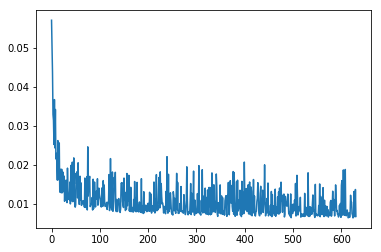

 64%|██████▍   | 640/1000 [02:38<01:08,  5.25it/s]

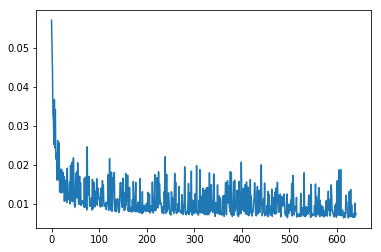

 65%|██████▌   | 650/1000 [02:40<01:05,  5.31it/s]

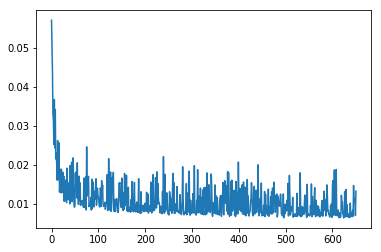

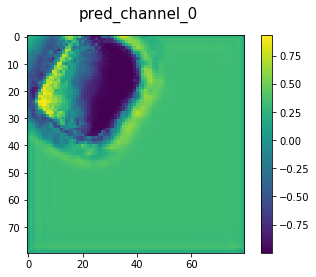

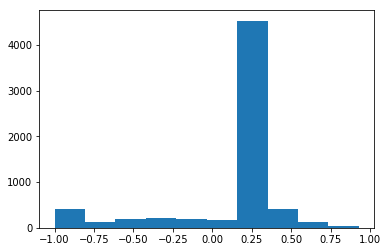

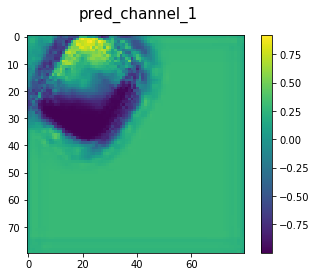

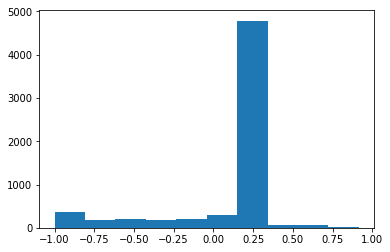

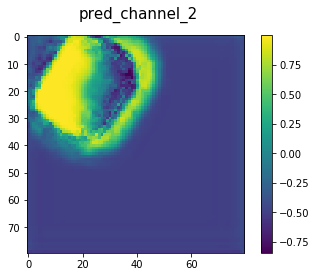

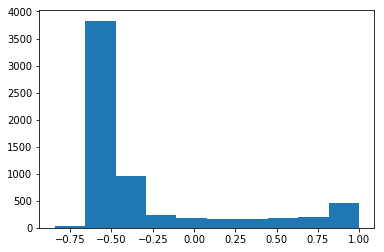

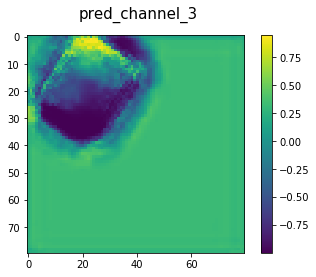

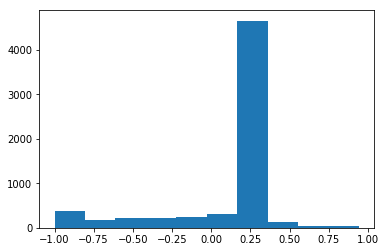

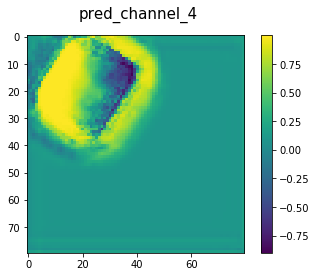

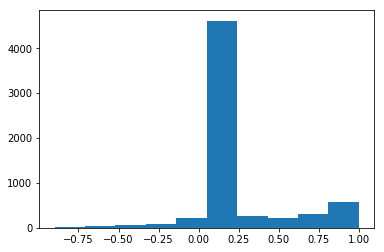

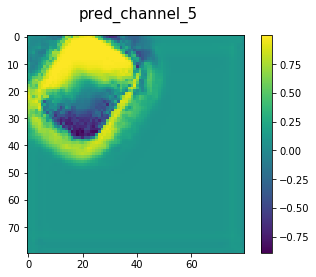

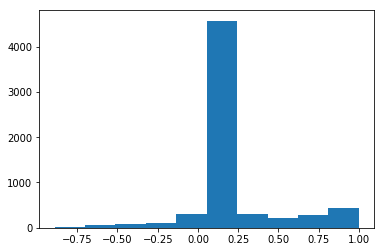

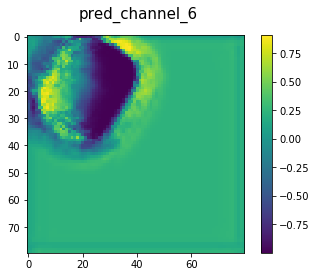

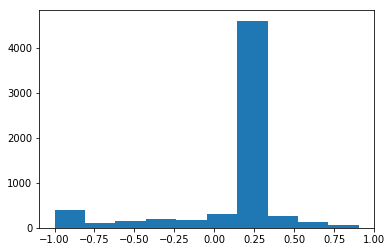

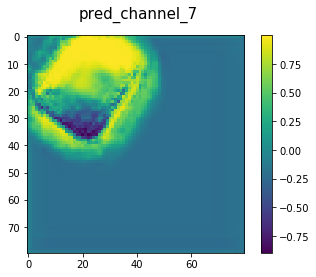

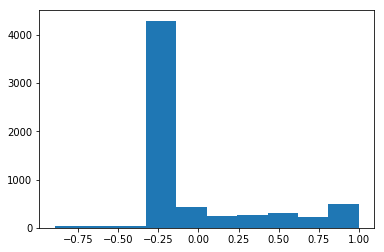

 66%|██████▌   | 660/1000 [02:44<01:13,  4.61it/s]

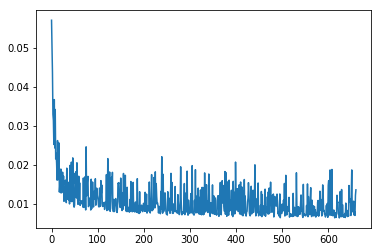

 67%|██████▋   | 670/1000 [02:46<01:02,  5.25it/s]

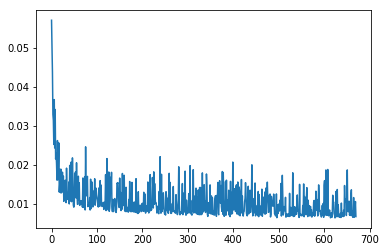

 68%|██████▊   | 680/1000 [02:48<01:00,  5.27it/s]

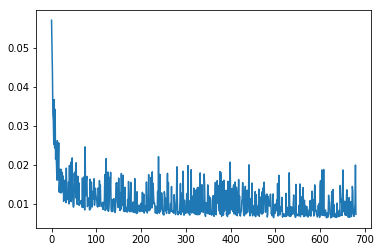

 69%|██████▉   | 690/1000 [02:50<00:58,  5.31it/s]

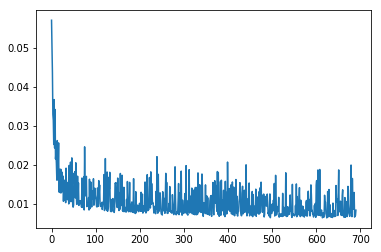

 70%|███████   | 700/1000 [02:52<00:56,  5.27it/s]

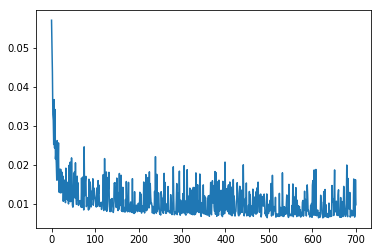

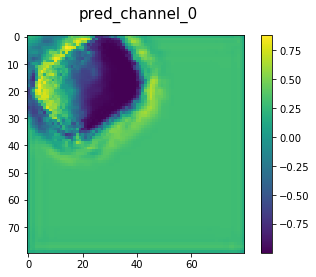

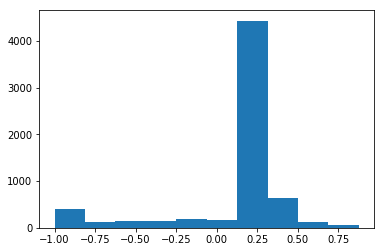

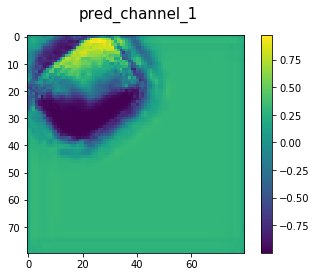

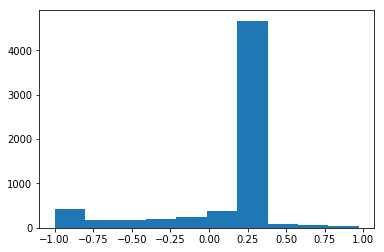

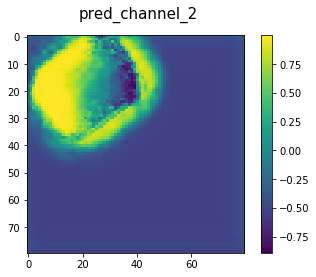

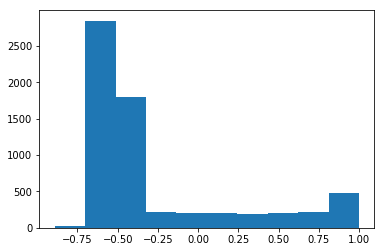

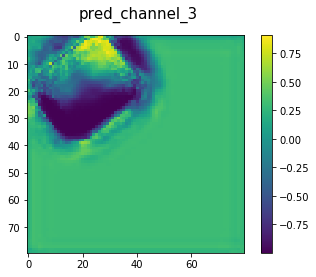

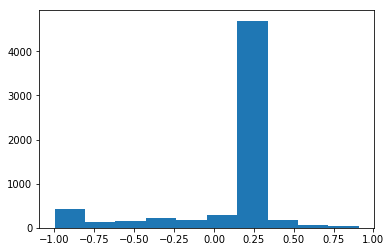

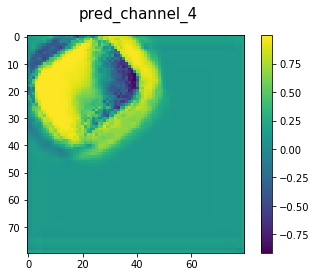

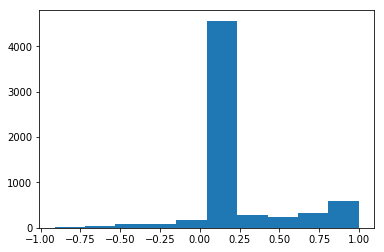

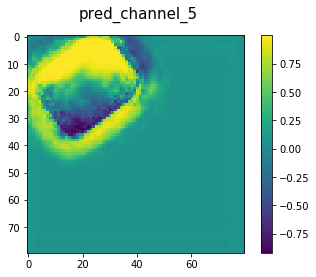

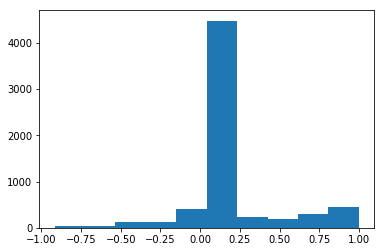

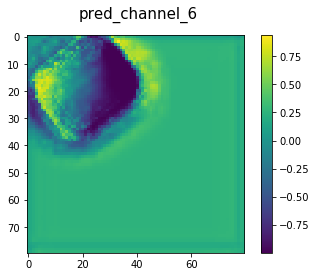

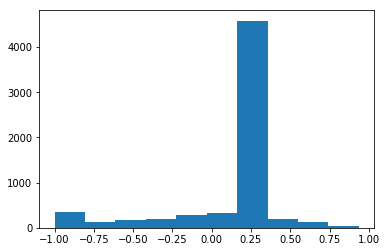

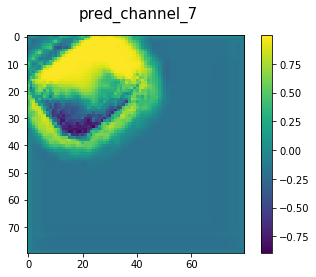

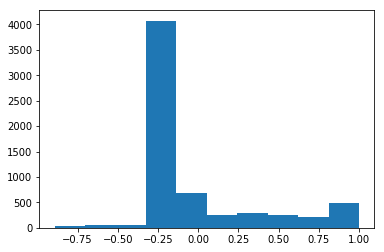

 71%|███████   | 710/1000 [02:57<01:03,  4.58it/s]

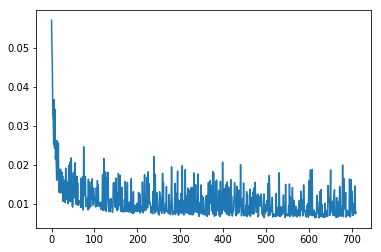

 72%|███████▏  | 720/1000 [02:59<00:53,  5.27it/s]

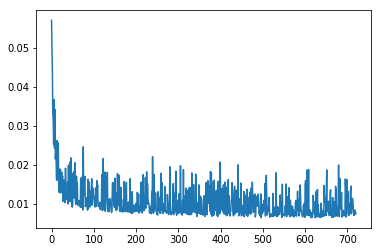

 73%|███████▎  | 730/1000 [03:01<00:51,  5.29it/s]

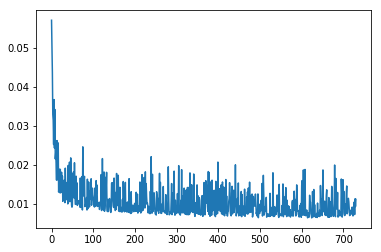

 74%|███████▍  | 740/1000 [03:03<00:49,  5.25it/s]

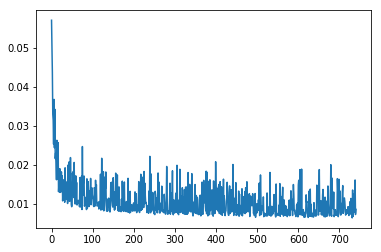

 75%|███████▌  | 750/1000 [03:05<00:48,  5.19it/s]

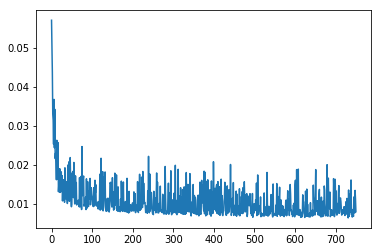

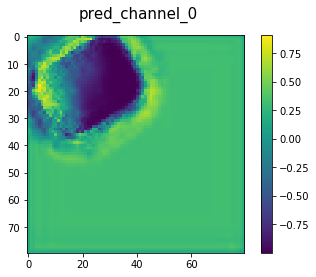

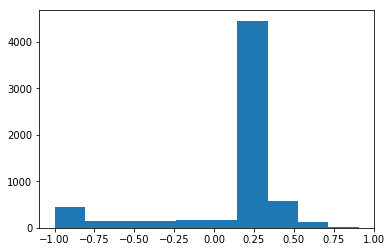

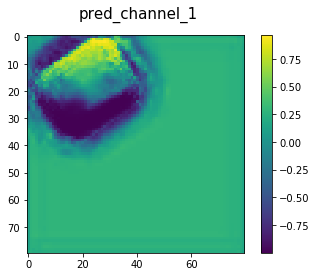

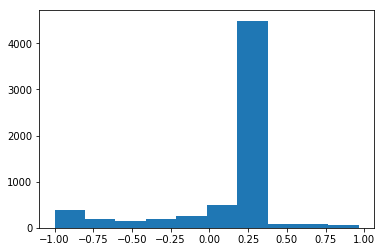

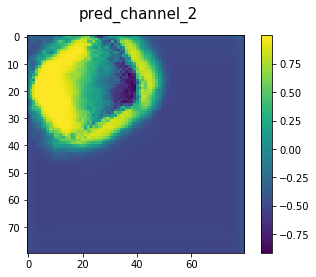

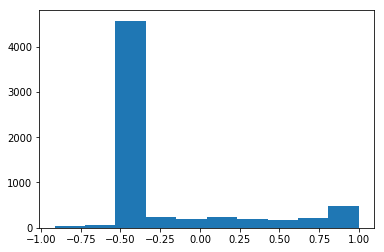

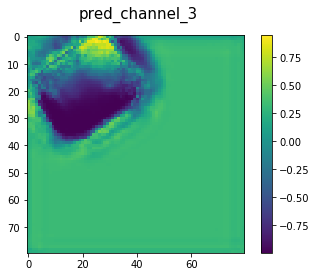

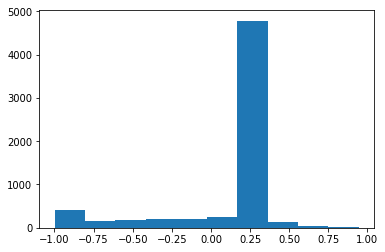

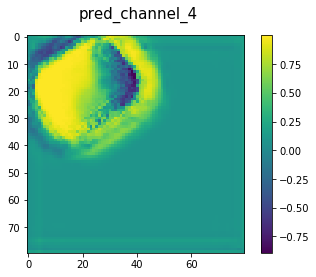

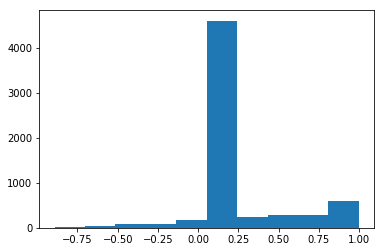

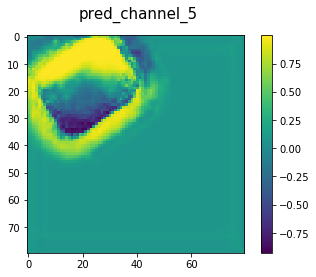

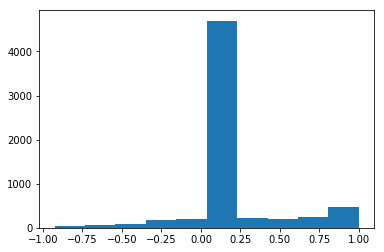

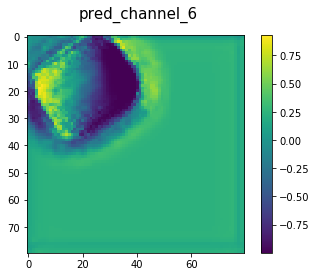

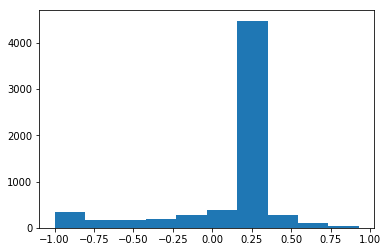

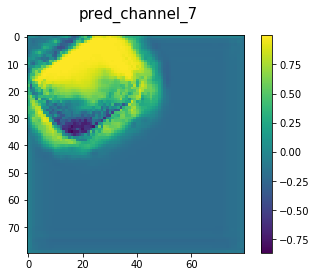

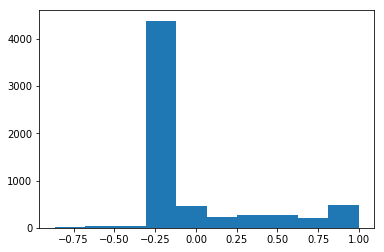

 76%|███████▌  | 760/1000 [03:09<00:52,  4.59it/s]

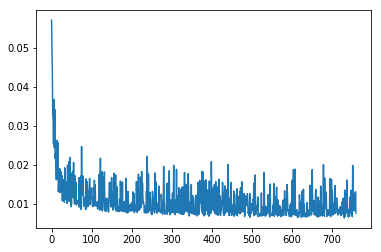

 77%|███████▋  | 770/1000 [03:11<00:43,  5.27it/s]

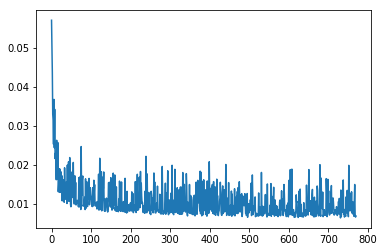

 78%|███████▊  | 780/1000 [03:13<00:41,  5.30it/s]

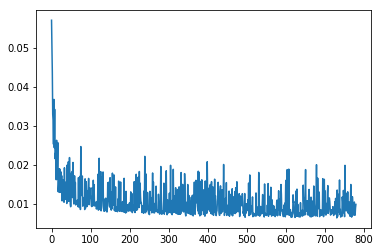

 79%|███████▉  | 790/1000 [03:15<00:39,  5.29it/s]

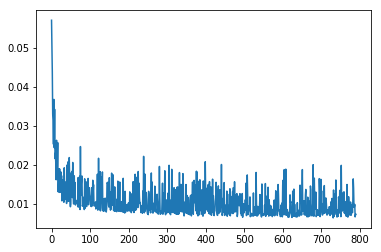

 80%|████████  | 800/1000 [03:17<00:37,  5.29it/s]

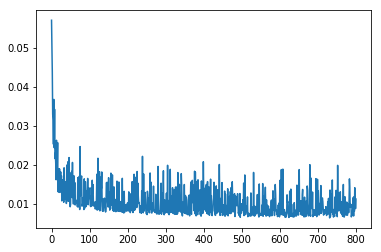

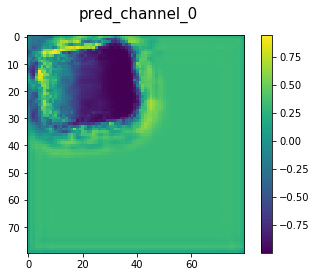

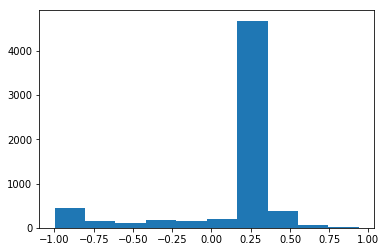

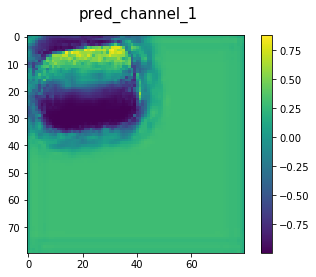

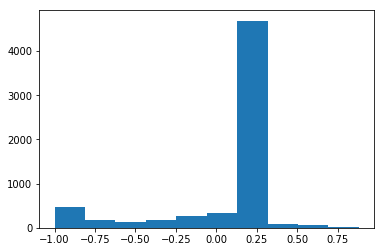

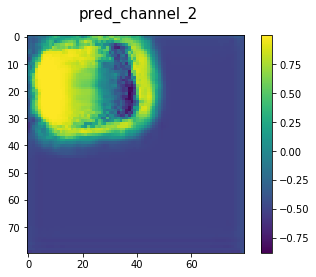

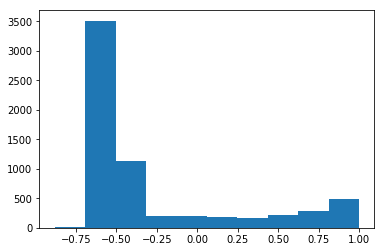

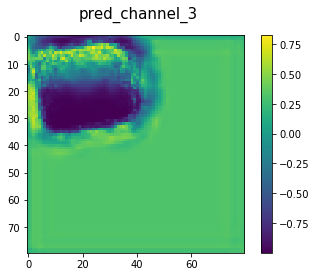

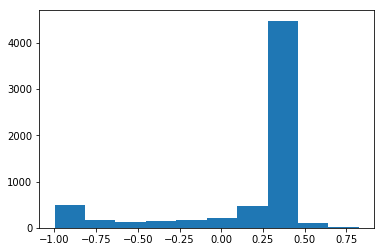

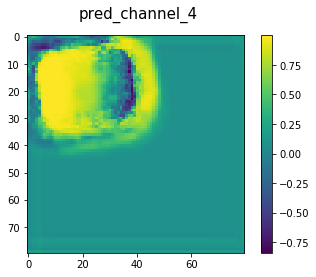

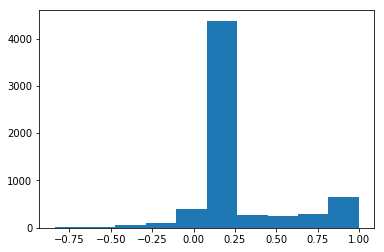

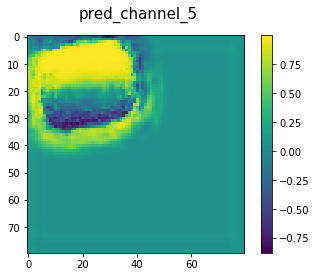

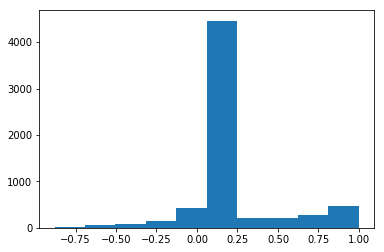

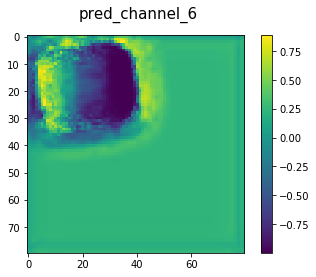

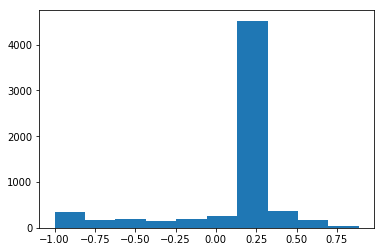

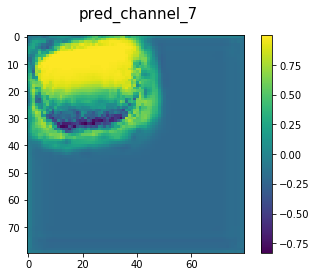

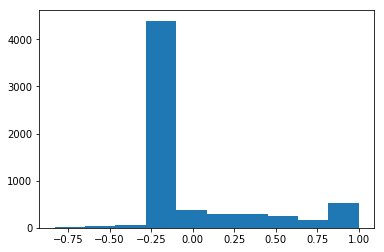

 81%|████████  | 810/1000 [03:21<00:41,  4.61it/s]

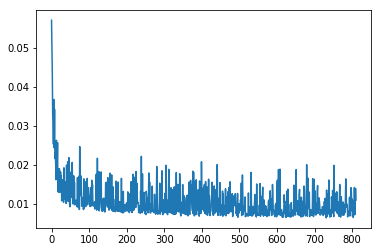

 82%|████████▏ | 820/1000 [03:23<00:34,  5.27it/s]

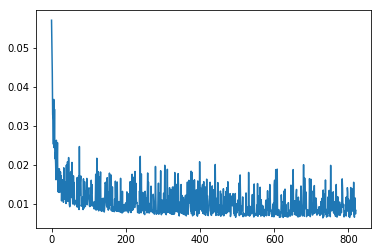

 83%|████████▎ | 830/1000 [03:25<00:32,  5.29it/s]

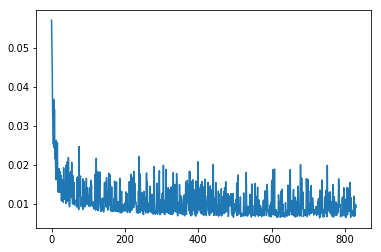

 84%|████████▍ | 840/1000 [03:27<00:30,  5.30it/s]

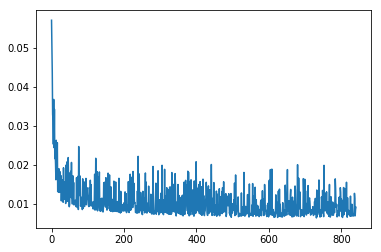

 85%|████████▌ | 850/1000 [03:29<00:28,  5.31it/s]

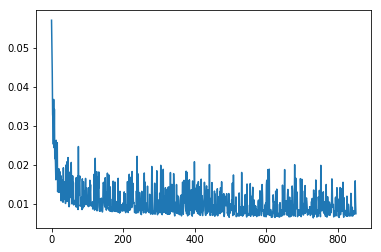

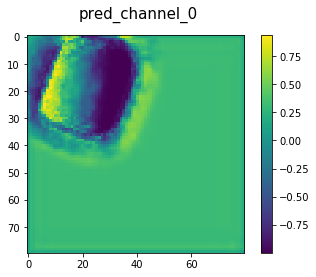

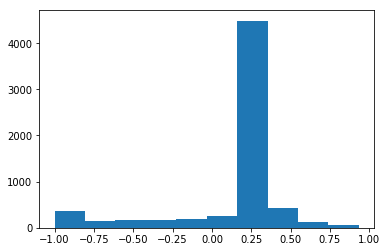

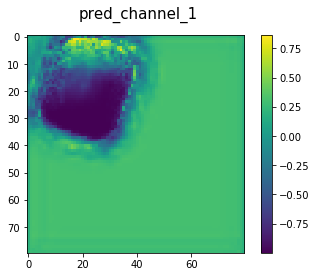

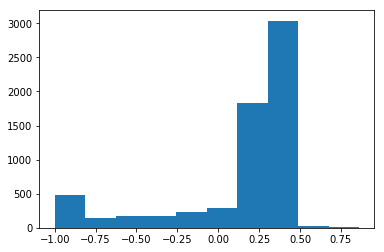

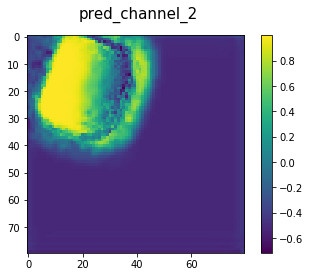

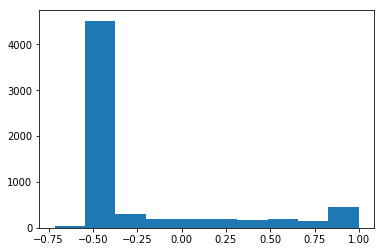

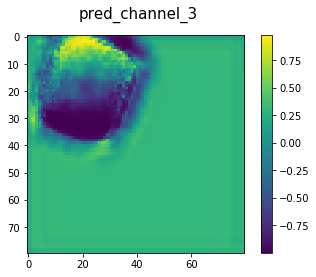

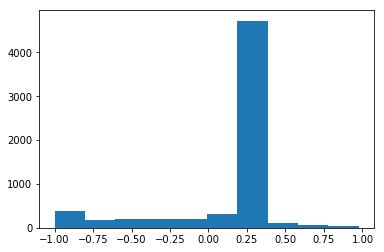

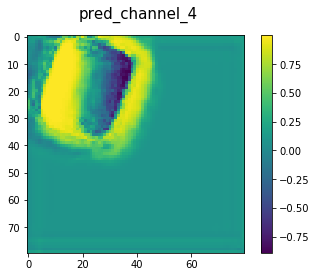

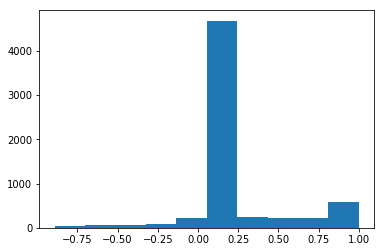

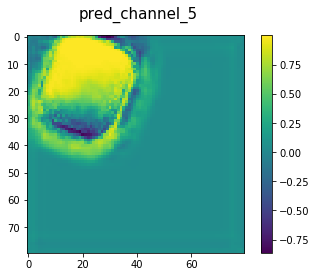

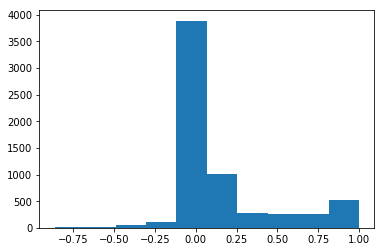

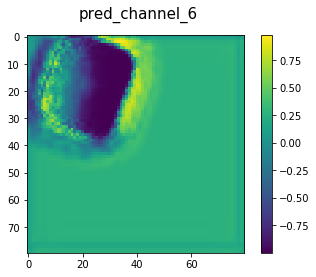

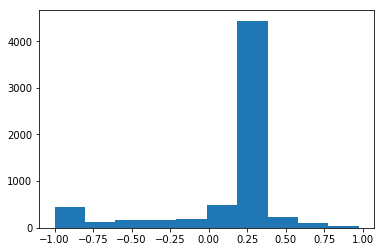

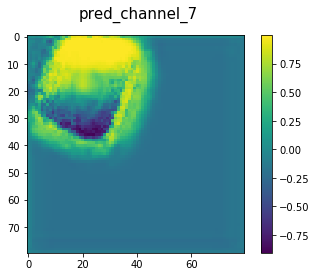

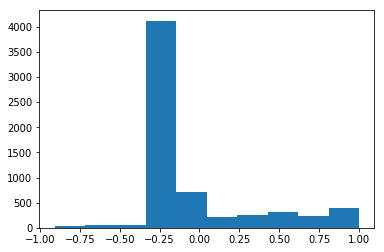

 86%|████████▌ | 860/1000 [03:34<00:30,  4.62it/s]

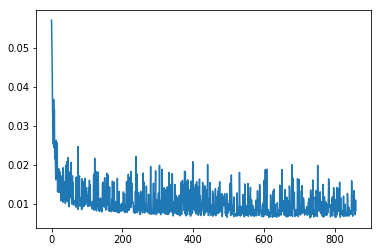

 87%|████████▋ | 870/1000 [03:36<00:24,  5.29it/s]

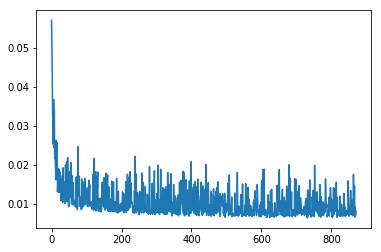

 88%|████████▊ | 880/1000 [03:38<00:22,  5.30it/s]

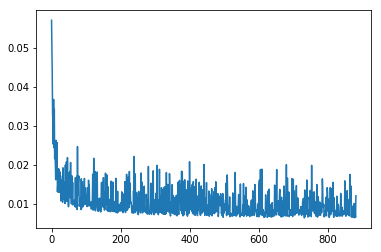

 89%|████████▉ | 890/1000 [03:40<00:20,  5.30it/s]

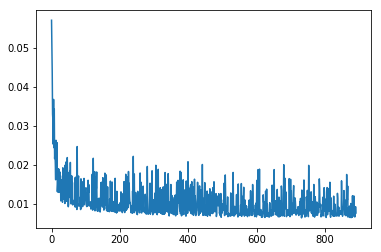

 90%|█████████ | 900/1000 [03:42<00:18,  5.31it/s]

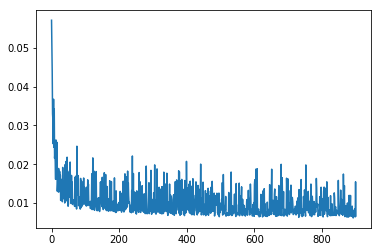

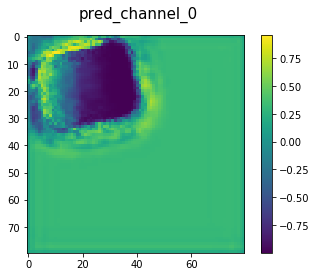

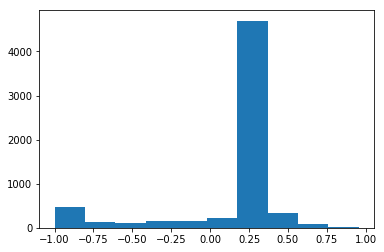

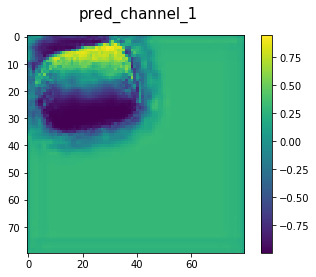

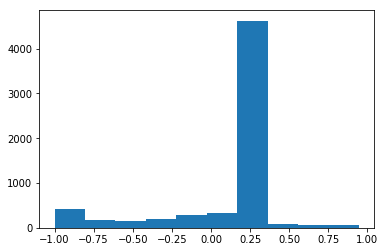

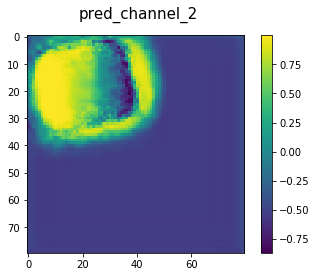

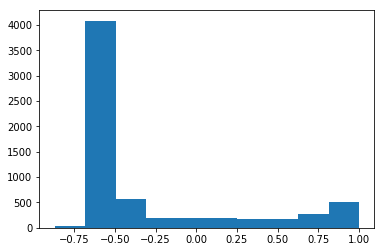

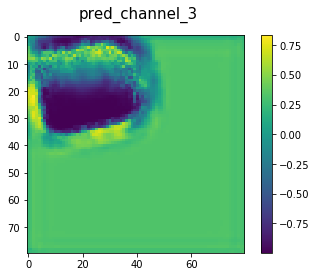

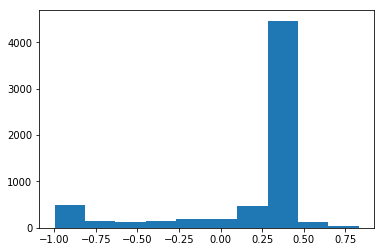

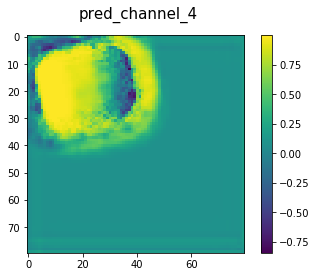

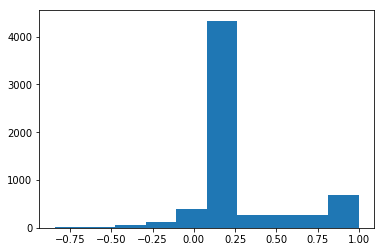

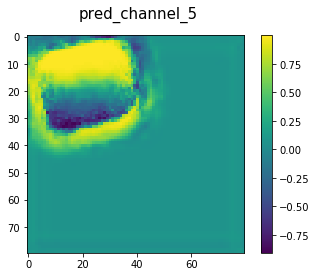

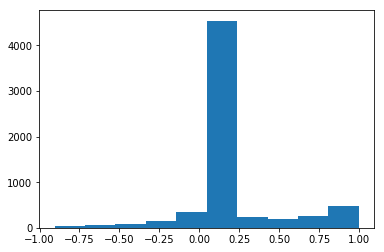

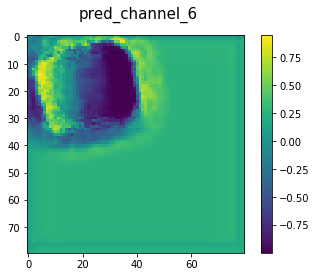

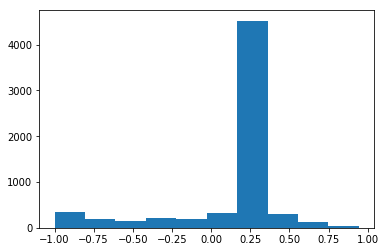

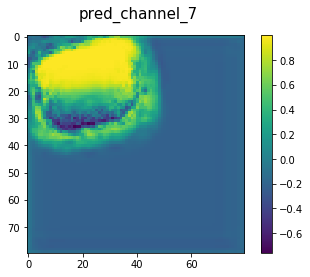

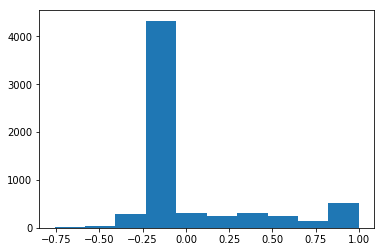

 91%|█████████ | 910/1000 [03:46<00:19,  4.62it/s]

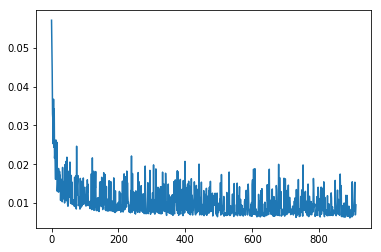

 92%|█████████▏| 920/1000 [03:48<00:15,  5.29it/s]

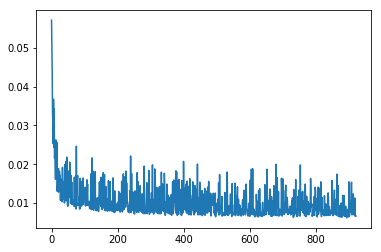

 93%|█████████▎| 930/1000 [03:50<00:13,  5.31it/s]

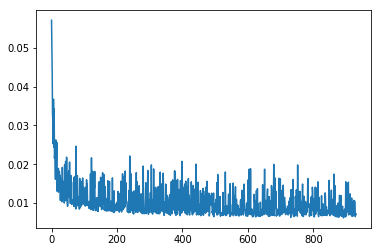

 94%|█████████▍| 940/1000 [03:52<00:11,  5.31it/s]

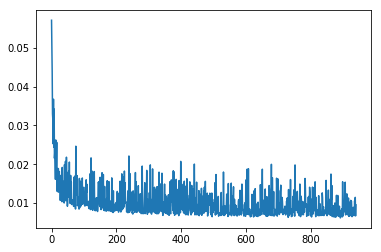

 95%|█████████▌| 950/1000 [03:54<00:09,  5.32it/s]

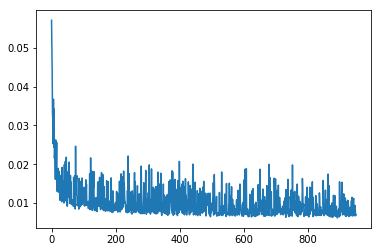

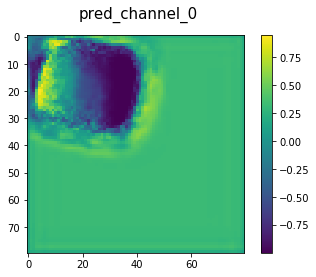

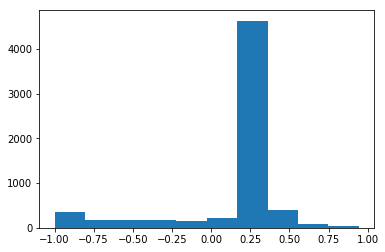

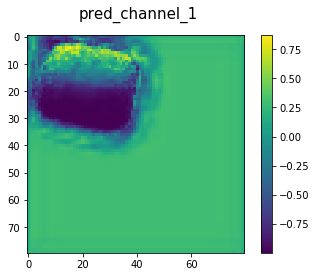

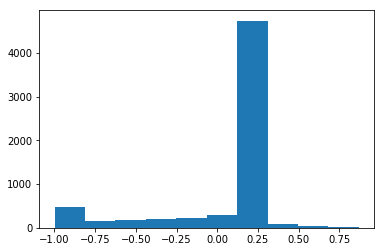

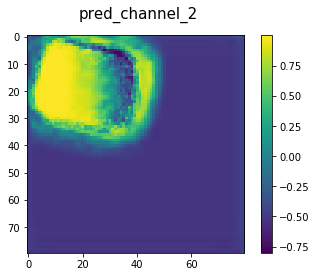

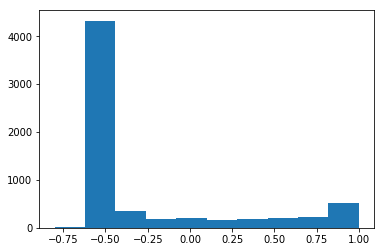

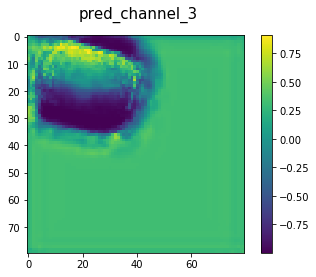

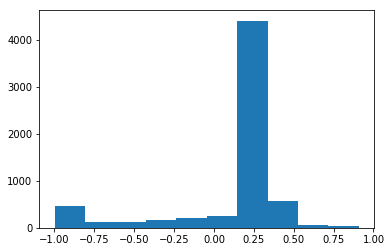

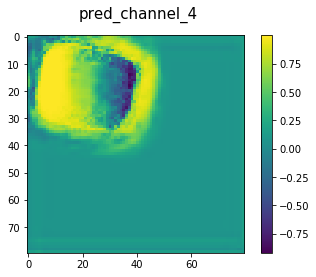

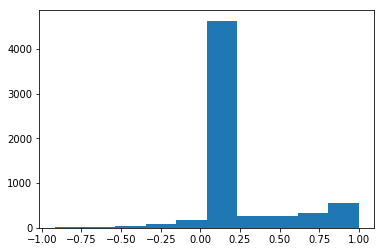

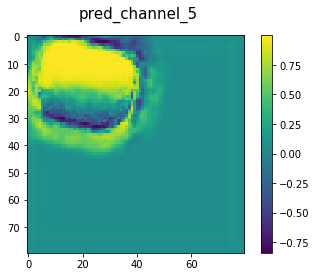

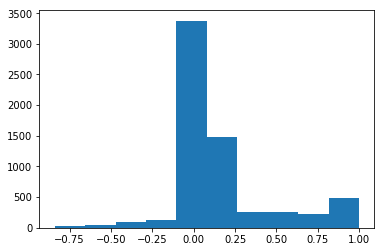

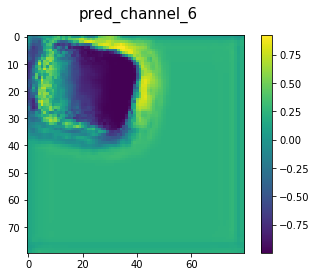

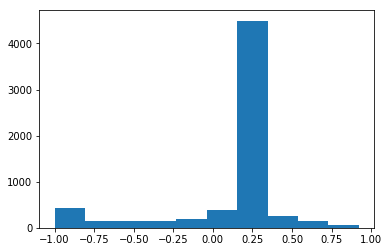

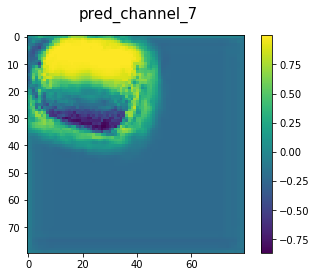

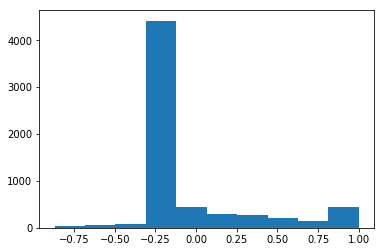

 96%|█████████▌| 960/1000 [03:58<00:08,  4.62it/s]

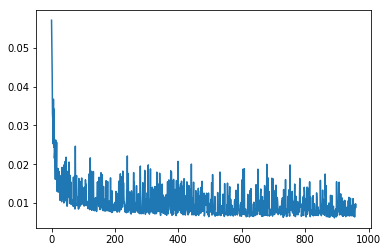

 97%|█████████▋| 970/1000 [04:00<00:05,  5.21it/s]

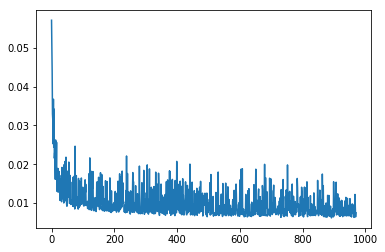

 98%|█████████▊| 980/1000 [04:02<00:03,  5.29it/s]

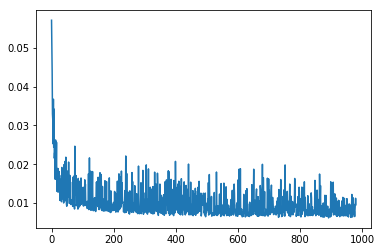

 99%|█████████▉| 990/1000 [04:04<00:01,  5.32it/s]

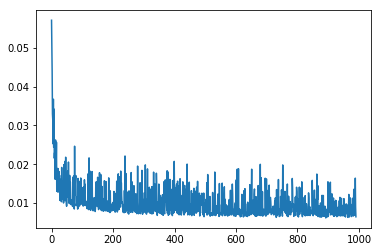

100%|██████████| 1000/1000 [04:06<00:00,  5.33it/s]


In [19]:
from tqdm import tqdm
losses = []

plt.figure(figsize=(10,10))


# Training for loop
for i in tqdm(range(1000)):
    imgs, labels = db.generate_batch(n=2)
    
    # Hacky solution move this away
    imgs_c = np.moveaxis(imgs, -1, 1).astype(np.float32)
    labels_c = labels.reshape(labels.shape[0],1,8).astype(np.float32)
    
    # Downsample and encode
    imgs_down, labels_down = downsample(imgs_c, labels_c)
    gt_class, gt_loc = encode_y(imgs_down, labels_down)
    
    imgs_gpu = chainer.Variable(cuda.to_gpu(imgs_c)) #gpu
    
    gt_class, gt_loc = encode_y(imgs_down, labels_down) #cpu
    
    gt_class.to_gpu(0)
    gt_loc.to_gpu(0)

    # Forward pass: SLOW!!!
    pred_class, pred_loc = net(imgs_gpu) #net(imgs) #gpu
    
    
   # Loss calculation
#     class_loss = classification_loss(pred_class, gt_class)

    net_loss = regression_loss(pred_loc, gt_loc, gt_class)
    
    
    #net_loss = loss(pred_class, pred_loc, gt_class, gt_loc, lambd=1)
    #print(net_loss.debug_print())
    #net_loss.to_gpu(0)
    
    # Update network
    net.zerograds()
    net_loss.backward()
    optimizer.update()
    
    # Print loss
    #show_image(pred_class.data[0,0,:,:], 'prediction output vgg')
    #
    #show_image(gt_class.data[0,0,:,:], 'class output vgg')
    losses.append(net_loss.data.get())
    
    #print(net_loss.data)
    if i % 10 == 0:
        plt.plot(range(len(losses)), losses)
        plt.show()
        
    if i%50==0:
        for c in range(8):
            fig = plt.figure()
            fig.suptitle('pred_channel_%d'%c, fontsize=15)

            img = cuda.to_cpu(pred_loc[0,c,:,:].data)
            #print(img.)
            plt.imshow(img); plt.colorbar(); plt.show()
            plt.show()
            #img_c = np.zeros((320,320,3), dtype=np.uint8)

            #plt.imshow(img, interpolation=None); plt.colorbar(); plt.show()

            #draw_quad(img_c, labels[0][0].astype(np.uint64))
            #plt.imshow(img_c); plt.show()

            plt.hist(img.ravel()); plt.show()
    
# Final loss plot